## This is the k-nearest neighbors workbook for ECE 239AS Assignment #2

Please follow the notebook linearly to implement k-nearest neighbors.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with the data, training and evaluating a simple classifier, k-fold cross validation, and as a Python refresher.

## Import the appropriate libraries

In [238]:
import numpy as np # for doing most of our calculations
import matplotlib.pyplot as plt# for plotting
from cs231n.data_utils import load_CIFAR10 # function to load the CIFAR-10 dataset.

# Load matplotlib images inline
%matplotlib inline

# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [239]:
# Set the path to the CIFAR-10 data
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/random.py


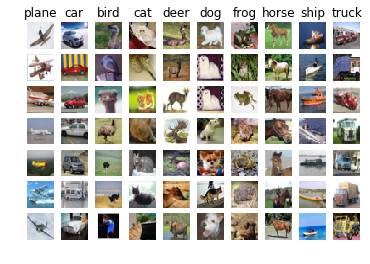

In [240]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
import random

print(random.__file__)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [241]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


# K-nearest neighbors

In the following cells, you will build a KNN classifier and choose hyperparameters via k-fold cross-validation.

In [242]:
# Import the KNN class

from nndl import KNN

In [243]:
# Declare an instance of the knn class.
knn = KNN()

# Train the classifier.
#   We have implemented the training of the KNN classifier.
#   Look at the train function in the KNN class to see what this does.
knn.train(X=X_train, y=y_train)

# Questions

(1) Describe what is going on in the function knn.train().

(2) What are the pros and cons of this training step?

## Answers

(1) In this training function, the knn class is learning the training data simply by storing it in memory. In this case, it is being stored as a dictionary.

(2) The pros are that it is a simple training function. The con is that it takes up a lot of memory space.

## KNN prediction

In the following sections, you will implement the functions to calculate the distances of test points to training points, and from this information, predict the class of the KNN.

In [245]:
# Implement the function compute_distances() in the KNN class.
# Do not worry about the input 'norm' for now; use the default definition of the norm
#   in the code, which is the 2-norm.
# You should only have to fill out the clearly marked sections.

import time
time_start =time.time()

dists_L2 = knn.compute_distances(X=X_test)

print('Time to run code: {}'.format(time.time()-time_start))
print('Frobenius norm of L2 distances: {}'.format(np.linalg.norm(dists_L2, 'fro')))

Time to run code: 45.32974624633789
Frobenius norm of L2 distances: 7906696.077040902


#### Really slow code

Note: 
This probably took a while. This is because we use two for loops.  We could increase the speed via vectorization, removing the for loops.

If you implemented this correctly, evaluating np.linalg.norm(dists_L2, 'fro') should return: ~7906696

### KNN vectorization

The above code took far too long to run.  If we wanted to optimize hyperparameters, it would be time-expensive.  Thus, we will speed up the code by vectorizing it, removing the for loops.

In [246]:
# Implement the function compute_L2_distances_vectorized() in the KNN class.
# In this function, you ought to achieve the same L2 distance but WITHOUT any for loops.
# Note, this is SPECIFIC for the L2 norm.

time_start =time.time()
dists_L2_vectorized = knn.compute_L2_distances_vectorized(X=X_test)
print('Time to run code: {}'.format(time.time()-time_start))
print('Difference in L2 distances between your KNN implementations (should be 0): {}'.format(np.linalg.norm(dists_L2 - dists_L2_vectorized, 'fro')))

Time to run code: 0.43923521041870117
Difference in L2 distances between your KNN implementations (should be 0): 0.0


#### Speedup

Depending on your computer speed, you should see a 10-100x speed up from vectorization.  On our computer, the vectorized form took 0.36 seconds while the naive implementation took 38.3 seconds. 

### Implementing the prediction

Now that we have functions to calculate the distances from a test point to given training points, we now implement the function that will predict the test point labels.

In [247]:
# Implement the function predict_labels in the KNN class.
# Calculate the training error (num_incorrect / total_samples) 
#   from running knn.predict_labels with k=1

error = 1

# ================================================================ #
# YOUR CODE HERE:
#   Calculate the error rate by calling predict_labels on the test 
#   data with k = 1.  Store the error rate in the variable error.
# ================================================================ #
predicted = knn.predict_labels(dists_L2_vectorized, 20)
diff = [1 if predicted != actual else 0 for predicted, actual in zip(predicted, y_test)]
error = sum(diff) / len(y_test)

print(error)

[420, 3684, 4224, 1161, 4550, 1728, 3949, 1500]
[2192, 4848, 2166, 2172, 3644, 3665, 2318, 707]
[4469, 909, 3904, 1726, 139, 1119, 1711, 2003]
[252, 4453, 4270, 2172, 3039, 1732, 4807, 1119]
[1881, 3949, 3797, 4604, 4262, 4905, 2535, 3841]
[2654, 347, 1983, 2372, 4130, 2812, 831, 1838]
[4033, 831, 22, 3525, 1184, 2945, 1367, 2971]
[910, 4055, 1838, 2746, 347, 3761, 196, 831]
[4808, 1686, 1283, 4634, 4306, 4683, 3759, 1340]
[2096, 4320, 126, 193, 1462, 554, 2882, 3870]
[303, 456, 1759, 4808, 1540, 3609, 2534, 2459]
[139, 722, 2905, 4291, 4207, 3246, 4834, 4953]
[2745, 3540, 4124, 528, 894, 4608, 1339, 4660]
[825, 4279, 920, 359, 3122, 3427, 3959, 1470]
[271, 4066, 2749, 1264, 420, 1092, 2989, 3874]
[4183, 4453, 1832, 3121, 2749, 1564, 1759, 2942]
[4153, 1160, 2550, 4808, 1600, 4978, 4905, 4350]
[80, 4864, 4045, 254, 383, 3376, 3703, 149]
[3059, 2192, 2670, 3115, 2166, 2156, 3882, 1413]
[1881, 4139, 4604, 4112, 2535, 4231, 4325, 243]
[2693, 1440, 1038, 3116, 4703, 4208, 3559, 2678]
[1522

[3166, 1777, 243, 1917, 3383, 2830, 4732, 1485]
[1178, 4941, 757, 3918, 3184, 2512, 4096, 1782]
[2229, 3579, 557, 1249, 4723, 3049, 891, 2867]
[420, 1838, 4550, 2983, 1881, 2812, 3226, 3847]
[3383, 4106, 4482, 4732, 1530, 2812, 1436, 2836]
[3608, 3997, 982, 1067, 2998, 2796, 4094, 3801]
[337, 4695, 951, 1500, 2875, 2695, 2595, 420]
[986, 3423, 420, 1553, 4755, 2565, 3994, 1670]
[1677, 4905, 2779, 1881, 2522, 3684, 3841, 3949]
[2172, 406, 2192, 676, 3039, 2642, 4828, 1278]
[1643, 420, 4577, 4066, 1264, 2610, 2966, 2749]
[982, 4527, 120, 2868, 3376, 3074, 1065, 2993]
[1933, 2005, 2745, 3469, 3065, 4925, 432, 1162]
[1838, 2812, 622, 2983, 3797, 420, 4550, 1746]
[1323, 1229, 4320, 1166, 4861, 793, 2330, 3324]
[2730, 3797, 452, 3944, 3684, 1881, 4905, 2372]
[974, 2034, 4683, 557, 1340, 4617, 786, 2867]
[4645, 2176, 1787, 4056, 3382, 4601, 2662, 4765]
[2982, 2066, 80, 3949, 3376, 1283, 303, 4853]
[2017, 820, 3962, 1104, 1878, 2977, 3411, 1027]
[4755, 1120, 4224, 3235, 4491, 452, 1937, 3077]


If you implemented this correctly, the error should be: 0.726.

This means that the k-nearest neighbors classifier is right 27.4% of the time, which is not great, considering that chance levels are 10%.

# Optimizing KNN hyperparameters

In this section, we'll take the KNN classifier that you have constructed and perform cross-validation to choose a best value of $k$, as well as a best choice of norm.

### Create training and validation folds

First, we will create the training and validation folds for use in k-fold cross validation.

In [134]:
# Create the dataset folds for cross-valdiation.
num_folds = 5

X_train_folds = []
y_train_folds = []

# ================================================================ #
# YOUR CODE HERE:
#   Split the training data into num_folds (i.e., 5) folds.
#   X_train_folds is a list, where X_train_folds[i] contains the 
#      data points in fold i.
#   y_train_folds is also a list, where y_train_folds[i] contains
#      the corresponding labels for the data in X_train_folds[i]
# ================================================================ #

# combine X_train and y_train (just make y_train an extra column)
# shuffle them
# then split into k folds, and extract y_train (do the opposite as you did before)

last = X_train.shape[1]
combined = np.append(X_train, y_train.reshape(y_train.shape[0],1), axis=1)
np.random.shuffle(combined)
rows = int(X_train.shape[0] / 5)

for i in np.arange(5):
    X_train_folds.append(combined[(i*rows):((i+1)*rows),:last].flatten())
    y_train_folds.append(combined[(i*rows):((i+1)*rows),last])


### Optimizing the number of nearest neighbors hyperparameter.

In this section, we select different numbers of nearest neighbors and assess which one has the lowest k-fold cross validation error.

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[282, 1450]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[102, 1083]
0.0
0.0
!
{0.0: 2}
[1571, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[910, 1914]
0.0
0.0
!
{0.0: 2}
[3890, 2763]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3422, 2888]
7.0
7.0
!
{7.0: 2}
[2085, 304]
9.0
9.0
!
{9.0: 2}
[2842, 2910]
8.0
8.0
!
{8.0: 2}
[93, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 2027]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[444, 3766]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1943, 880]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1490, 3311]
8.0
8.0
!
{8.0: 2}
[3594, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[815, 2725]
4.0
4.0
!
{4.0: 2}
[2890, 3616]
8.0
8.0
!
{8.0: 2}
[489, 492]
2.0
2.0
!
{2.0: 2}
[106, 3821]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[332

[1471, 1258]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3489, 1835]
6.0
6.0
!
{6.0: 2}
[3362, 1244]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[737, 2277]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3327, 78]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3586, 1808]
6.0
6.0
!
{6.0: 2}
[1471, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[204, 1711]
2.0
2.0
!
{2.0: 2}
[1914, 1389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3210, 599]
8.0
8.0
!
{8.0: 2}
[3586, 3661]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1295, 204]
2.0
2.0
!
{2.0: 2}
[2649, 1276]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[978, 714]
4.0
4.0
!
{4.0: 2}
[272, 682]
6.0
6.0
!
{6.0: 2}
[3152, 2670]
0.0
0.0
!
{0.0: 2}
[3002, 2837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3996, 3082]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3488, 657]
4.0
4.0
!
{4.0: 2}
[3386, 3602]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[959, 2762]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2927, 449]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[833, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[254, 217]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[3543, 1713]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[409, 2285]
0.0
0.0
!
{0.0: 2}
[296, 3002]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[882, 645]
0.0
8.0

2.0
!
{2.0: 2}
[2759, 3574]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1572, 1757]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3067, 2497]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[3610, 488]
8.0
8.0
!
{8.0: 2}
[3834, 2213]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1031, 1664]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[882, 2030]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3840, 1674]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2927, 1419]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3161, 1139]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[336, 3574]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[572, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[116, 2321]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3606, 338]
2.0
2.0
!
{2.0: 2}
[2303, 604]
5.0
5.0
!
{5.0: 2}
[2670, 2277]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2670, 2208]
0.0
0.0
!
{0.0: 2}
[1914, 46]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[2982, 3674]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2745, 2811]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[28, 3609]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[2462, 3948]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1704, 1999]
2.0
2.0
!
{2.0: 2}
[3543, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3405, 1173]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[296, 3402]
3.0
3.0
!
{3.0: 2}
[2821

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[1810, 957]
8.0
8.0
!
{8.0: 2}
[2388, 2979]
8.0
8.0
!
{8.0: 2}
[2789, 124]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3913, 2464]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[608, 622]
2.0
2.0
!
{2.0: 2}
[906, 2144]
0.0
0.0
!
{0.0: 2}
[1145, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3290, 152]
3.0
3.0
!
{3.0: 2}
[846, 3112]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1389, 1776]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[2133, 3902]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2931, 1714]
0.0
0.0
!
{0.0: 2}
[631, 3109]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[481, 157]
0.0
0.0
!
{0.0: 2}
[3521, 2609]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[475, 1945]
4.0
4.0
!
{4.0: 2}
[3735, 2893]
1.0
9.0
!
{1.0: 1, 9.0: 1}
[60, 1164]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3821, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[542, 2750]
6.0
6.0
!
{6.0: 2}
[35, 1769]
4.0
4.0
!
{4.0: 2}
[1907, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1164, 1145]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3374, 1230]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3800, 2837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2327, 2729]
4.0
4.0
!
{4.0: 2}
[2213, 2609]
4.0
5.0
!
{4.

[3370, 2157]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[550, 149]
2.0
2.0
!
{2.0: 2}
[3327, 622]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3483, 1163]
8.0
8.0
!
{8.0: 2}
[2291, 3576]
6.0
6.0
!
{6.0: 2}
[1306, 1389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[2834, 831]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1166, 89]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 2703]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3271, 2497]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2170, 1460]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[73, 1968]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2643, 2837]
2.0
2.0
!
{2.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2902, 2587]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[98, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3580, 1161]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[220, 869]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1619, 2229]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1161, 3228]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1504, 640]
2.0
2.0
!
{2.0: 2}
[3757, 35]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3483, 2989]
8.0
8.0
!
{8.0: 2}
[905, 3231]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[1697, 2822]
5.0
1.0
!
{5.0: 1, 1.0: 1}
[3438, 869]
4.0
4.0
!
{4.0: 2}
[3791, 2026]
2.0
6.0
!
{2.0: 1, 6

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[2910, 564]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2903, 1992]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1532, 2661]
8.0
8.0
!
{8.0: 2}
[739, 2]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1259, 2837]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3497, 261]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1451, 1645]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3633, 2503]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1113, 1616]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[1591, 2747]
4.0
4.0
!
{4.0: 2}
[335, 2712]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3220, 979]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1657, 964]
4.0
4.0
!
{4.0: 2}
[1532, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2546, 1532]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2670, 2277]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[869, 3029]
4.0
4.0
!
{4.0: 2}
[2643, 1340]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2496, 1859]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3914, 70]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1094, 786]
6.0
6.0
!
{6.0: 2}
[35, 631]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1546, 35]
4.0
4.0
!
{4.0: 2}
[3408, 830]
4.0
4.0
!
{4.0: 2}
[2052, 2903]
2.0
2.0
!
{2.0: 2}
[2821, 2845]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3266

5.0
0.0
!
{5.0: 1, 0.0: 1}
[640, 1600]
2.0
2.0
!
{2.0: 2}
[3111, 3222]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[928, 623]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1624, 1888]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[2537, 2566]
4.0
4.0
!
{4.0: 2}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[810, 2703]
2.0
2.0
!
{2.0: 2}
[3696, 1609]
8.0
3.0
!
{8.0: 1, 3.0: 1}
[1486, 465]
4.0
4.0
!
{4.0: 2}
[822, 1116]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1515, 1196]
8.0
8.0
!
{8.0: 2}
[1232, 2424]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[822, 3609]
6.0
6.0
!
{6.0: 2}
[2845, 2703]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[98, 221]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[905, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2845, 2670]
0.0
0.0
!
{0.0: 2}
[2184, 1352]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[762, 36]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[3567, 1065]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1725, 87]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1197, 849]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1596, 3633]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[60, 136]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[723, 1562]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2000, 2816]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1626, 219

[ 4.  4.  2.  4.  2.  2.  4.  2.  8.  4.  7.  2.  3.  5.  4.  6.  0.  2.
  2.  8.  2.  0.  6.  4.  5.  3.  0.  3.  2.  3.  2.  2.  4.  3.  8.  2.
  1.  6.  2.  6.  4.  3.  3.  4.  0.  3.  0.  4.  1.  2.  4.  6.  2.  0.
  5.  4.  3.  7.  2.  4.  0.  7.  3.  0.  0.  0.  3.  0.  2.  2.  2.  0.
  2.  4.  6.  4.  4.  0.  7.  0.  8.  4.  2.  0.  2.  8.  2.  4.  8.  2.
  4.  4.  2.  0.  1.  1.  4.  0.  3.  6.  4.  2.  3.  2.  0.  4.  2.  4.
  0.  4.  3.  0.  2.  2.  5.  0.  0.  4.  4.  6.  8.  5.  0.  2.  0.  0.
  6.  0.  6.  0.  4.  2.  2.  8.  0.  4.  7.  0.  4.  4.  3.  4.  2.  0.
  4.  2.  0.  1.  6.  7.  3.  2.  4.  0.  2.  4.  1.  4.  0.  3.  2.  2.
  2.  0.  2.  4.  2.  8.  0.  2.  4.  0.  3.  4.  2.  4.  2.  0.  8.  2.
  2.  2.  0.  4.  0.  4.  2.  2.  2.  2.  2.  0.  2.  2.  5.  0.  0.  4.
  4.  0.  2.  0.  4.  0.  4.  2.  4.  3.  4.  7.  3.  5.  8.  4.  3.  2.
  0.  4.  0.  3.  4.  3.  5.  8.  0.  5.  4.  4.  0.  2.  3.  4.  4.  8.
  8.  2.  2.  2.  4.  0.  4.  2.  8.  4.  6.  0.  0

[3696, 265]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[623, 3532]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[2398, 3724]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1267, 1174]
8.0
8.0
!
{8.0: 2}
[1951, 2286]
1.0
2.0
!
{1.0: 1, 2.0: 1}
[3208, 2896]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[220, 1510]
5.0
8.0
!
{5.0: 1, 8.0: 1}
[3805, 2290]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2714, 3528]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1085, 2364]
4.0
4.0
!
{4.0: 2}
[2758, 35]
4.0
4.0
!
{4.0: 2}
[209, 136]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[2914, 1317]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1852, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[935, 3143]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3594, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2810, 757]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[564, 1910]
0.0
0.0
!
{0.0: 2}
[1419, 1823]
4.0
4.0
!
{4.0: 2}
[723, 2389]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[148, 3128]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1973, 3080]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3843, 3231]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3594, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3753, 134]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2825, 2956]
6.0
6.0
!
{6.0: 2}
[2070, 3080]
4.0
0.0
!


[1327, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1005, 608]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3290, 3327]
3.0
3.0
!
{3.0: 2}
[40, 493]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3733, 3124]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3174, 1609]
3.0
3.0
!
{3.0: 2}
[2389, 1682]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[1451, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1965, 673]
4.0
4.0
!
{4.0: 2}
[1682, 98]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1827, 326]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[1647, 1741]
8.0
8.0
!
{8.0: 2}
[3109, 386]
3.0
9.0
!
{3.0: 1, 9.0: 1}
[220, 3271]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1429, 935]
8.0
8.0
!
{8.0: 2}
[2984, 1357]
2.0
2.0
!
{2.0: 2}
[420, 2810]
8.0
8.0
!
{8.0: 2}
[481, 741]
0.0
0.0
!
{0.0: 2}
[98, 1889]
2.0
2.0
!
{2.0: 2}
[1682, 493]
6.0
6.0
!
{6.0: 2}
[403, 2633]
8.0
8.0
!
{8.0: 2}
[64, 1852]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[336, 1032]
8.0
8.0
!
{8.0: 2}
[2364, 3521]
4.0
4.0
!
{4.0: 2}
[3841, 2295]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[246, 1738]
6.0
6.0
!
{6.0: 2}
[3605, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3438, 3906]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2364, 2164]
4.

[1725, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[723, 1106]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[608, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1532, 2870]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[830, 89]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2835, 2769]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[825, 257]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[2755, 372]
4.0
4.0
!
{4.0: 2}
[1490, 1626]
8.0
8.0
!
{8.0: 2}
[967, 3683]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3408, 3049]
4.0
4.0
!
{4.0: 2}
[3528, 2044]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[2184, 3082]
0.0
0.0
!
{0.0: 2}
[681, 885]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[3587, 739]
4.0
4.0
!
{4.0: 2}
[3046, 3155]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[836, 2276]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[89, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3683, 3693]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2139, 1410]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[661, 673]
4.0
4.0
!
{4.0: 2}
[2183, 1396]
4.0
4.0
!
{4.0: 2}
[1908, 2409]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2627, 2097]
2.0
1.0
!
{2.0: 1, 1.0: 1}
[2254, 1267]
8.0
8.0
!
{8.0: 2}
[1111, 564]
0.0
0.0
!
{0.0: 2}
[296, 1995]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1103, 3567]


[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

!
{2.0: 2}
[3903, 3264]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1978, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 481]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[98, 2758]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2389, 1267]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1093, 869]
4.0
4.0
!
{4.0: 2}
[1539, 3241]
0.0
0.0
!
{0.0: 2}
[3544, 2968]
4.0
4.0
!
{4.0: 2}
[830, 3907]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1892, 2865]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[38, 980]
6.0
6.0
!
{6.0: 2}
[2504, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1582, 2571]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3404, 944]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[152, 1357]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1106, 1245]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2438, 1532]
8.0
8.0
!
{8.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3910, 1485]
8.0
8.0
!
{8.0: 2}
[2536, 1296]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1772, 205]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[257, 3719]
6.0
6.0
!
{6.0: 2}
[465, 40]
4.0
4.0
!
{4.0: 2}
[373, 3621]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[163, 2378]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2031, 3837]
4.0
2.0
!
{4.0: 1, 2.

!
{8.0: 1, 0.0: 1}
[3811, 98]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1668, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[220, 1022]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3845, 60]
0.0
0.0
!
{0.0: 2}
[1336, 1827]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1591, 755]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[494, 2389]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2134, 1204]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2757, 3750]
6.0
6.0
!
{6.0: 2}
[3931, 223]
0.0
0.0
!
{0.0: 2}
[2326, 3197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[127, 3661]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[785, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[58, 675]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3754, 220]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1928, 1942]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[167, 2185]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3419, 1892]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2810, 1103]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2389, 1336]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[35, 373]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[741, 3620]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[3388, 599]
8.0
8.0
!
{8.0: 2}
[3277, 1880]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1254, 442]
4.0
7.0
!
{4.0: 1, 7.

[2651, 3472]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2401, 1254]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[522, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2194, 2246]
5.0
1.0
!
{5.0: 1, 1.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[98, 1682]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2058, 1978]
4.0
4.0
!
{4.0: 2}
[1817, 465]
4.0
4.0
!
{4.0: 2}
[3605, 3707]
4.0
4.0
!
{4.0: 2}
[1245, 1106]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1984, 278]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[733, 54]
5.0
5.0
!
{5.0: 2}
[3750, 3620]
6.0
6.0
!
{6.0: 2}
[587, 1500]
8.0
8.0
!
{8.0: 2}
[3532, 1759]
8.0
8.0
!
{8.0: 2}
[436, 7]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[1978, 3354]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3556, 1776]
6.0
6.0
!
{6.0: 2}
[60, 2538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3497, 3670]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3896, 465]
4.0
4.0
!
{4.0: 2}
[407, 3829]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[869, 3707]
4.0
4.0
!
{4.0: 2}
[905, 3551]
4.0
4.0
!
{4.0: 2}
[3790, 3388]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1678, 1978]
4.0
4.0
!
{4.0: 2}
[1469, 1336]
2.0
2.0
!
{2.0: 2}
[3913, 944]
8.0
8.0
!
{8.0: 2}
[1827, 1430]


[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[3811, 2213]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1139, 730]
4.0
4.0
!
{4.0: 2}
[2523, 2725]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3683, 1936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3580, 1623]
2.0
2.0
!
{2.0: 2}
[2725, 815]
4.0
4.0
!
{4.0: 2}
[3966, 1161]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[2597, 505]
7.0
7.0
!
{7.0: 2}
[1060, 3912]
0.0
0.0
!
{0.0: 2}
[1757, 3164]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[282, 1450]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[102, 1083]
0.0
0.0
!
{0.0: 2}
[1571, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[910, 1914]
0.0
0.0
!
{0.0: 2}
[3890, 2763]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3422, 2888]
7.0
7.0
!
{7.0: 2}
[2085, 304]
9.0
9.0
!
{9.0: 2}
[2842, 2910]
8.0
8.0
!
{8.0: 2}
[93, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 

[2723, 1107]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 765]
4.0
4.0
!
{4.0: 2}
[254, 2310]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[22, 859]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3609, 967]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2865, 3917]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[1808, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1851, 1636]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[516, 1163]
8.0
8.0
!
{8.0: 2}
[376, 1835]
6.0
6.0
!
{6.0: 2}
[482, 3092]
5.0
8.0
!
{5.0: 1, 8.0: 1}
[2247, 3791]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1471, 1258]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3489, 1835]
6.0
6.0
!
{6.0: 2}
[3362, 1244]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[737, 2277]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3327, 78]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3586, 1808]
6.0
6.0
!
{6.0: 2}
[1471, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[204, 1711]
2.0
2.0
!
{2.0: 2}
[1914, 1389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3210, 599]
8.0
8.0
!
{8.0: 2}
[3586, 3661]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1295, 204]
2.0
2.0
!
{2.0: 2}
[2649, 1276]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[978, 714]
4.0
4.0
!
{4.0: 2}
[272, 682]
6.0
6.0
!
{6.0: 2}
[3152, 2670]
0.0
0.

[963, 3587]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3161, 3890]
3.0
3.0
!
{3.0: 2}
[1471, 3080]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3609, 394]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[227, 1183]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1538, 2700]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3890, 3805]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[1764, 3594]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1497, 1424]
8.0
8.0
!
{8.0: 2}
[1312, 2127]
0.0
0.0
!
{0.0: 2}
[267, 154]
8.0
8.0
!
{8.0: 2}
[3960, 6]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1011, 3813]
6.0
1.0
!
{6.0: 1, 1.0: 1}
[3016, 1825]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[22, 859]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1164, 994]
4.0
4.0
!
{4.0: 2}
[1693, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2717, 3408]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2756, 3528]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[885, 1279]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3575, 1325]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2052, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2795, 2397]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[217, 1011]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1312, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2488, 77]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[692, 394]
6.0
2

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[3717, 1627]
2.0
2.0
!
{2.0: 2}
[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[688, 95]
0.0
0.0
!
{0.0: 2}
[2748, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[98, 1173]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3357, 73]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1107, 2620]
2.0
6.0
!

{2.0: 2}
[3634, 2943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1509, 321]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[675, 1387]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1765, 2913]
8.0
8.0
!
{8.0: 2}
[73, 2545]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[234, 3821]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2027, 1279]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2497, 3327]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3913, 2070]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1027, 65]
5.0
5.0
!
{5.0: 2}
[3922, 1471]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2067, 3025]
4.0
4.0
!
{4.0: 2}
[1482, 519]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2026, 631]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2117, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2537, 1244]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[163, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2544, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[564, 2890]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2966, 2144]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1984, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[89, 2321]
2.0
2.0
!
{2.0: 2}
[1364, 2605]
4.0
4.0
!
{4.0: 2}
[35, 2643]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[869, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1776, 360

[1764, 425]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[1495, 2573]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3980, 1769]
4.0
4.0
!
{4.0: 2}
[2949, 3691]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[2283, 3999]
6.0
6.0
!
{6.0: 2}
[810, 3580]
2.0
2.0
!
{2.0: 2}
[1276, 640]
2.0
2.0
!
{2.0: 2}
[1471, 215]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[136, 3757]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1462, 3230]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1390, 1538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[522, 2521]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[64, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2720, 450]
7.0
7.0
!
{7.0: 2}
[1398, 326]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[2903, 550]
2.0
2.0
!
{2.0: 2}
[174, 2026]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[304, 73]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2523, 1226]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[146, 2197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1482, 3164]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2115, 3914]
2.0
2.0
!
{2.0: 2}
[2241, 1989]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[73, 1145]
2.0
2.0
!
{2.0: 2}
[215, 98]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2670, 3649]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3257, 

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[40, 465]
4.0
4.0
!
{4.0: 2}
[685, 1657]
4.0
4.0
!
{4.0: 2}
[1596, 1510]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2532, 60]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1158, 2163]
0.0
0.0
!
{0.0: 2}
[3768, 2354]
6.0
6.0
!
{6.0: 2}
[3483, 2001]
8.0
8.0
!
{8.0: 2}
[3672, 830]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2397, 847]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[521, 2729]
4.0
4.0
!
{4.0: 2}
[3327, 3963]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2750, 3824]
6.0
6.0
!
{6.0: 2}
[3762, 3047]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3914, 640]
2.0
2.0
!
{2.0: 2}
[2104, 2934]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[2670, 3145]
0.0
0.0
!
{0.0: 2}
[3543, 905]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3102, 2204]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2415, 3666]
1.0
1.0
!
{1.0: 2}
[3960, 1006]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[361, 723]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3805, 163]
8.0
4.0
!
{8.0: 1, 4.0: 

[894, 429]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[397, 2620]
6.0
6.0
!
{6.0: 2}
[1714, 1889]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[463, 713]
5.0
5.0
!
{5.0: 2}
[2333, 3651]
8.0
8.0
!
{8.0: 2}
[1596, 1171]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[2022, 1505]
7.0
7.0
!
{7.0: 2}
[2523, 2719]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[372, 73]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1174, 736]
8.0
8.0
!
{8.0: 2}
[481, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3906, 3954]
2.0
2.0
!
{2.0: 2}
[73, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[756, 3634]
4.0
4.0
!
{4.0: 2}
[3112, 382]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[475, 143]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3120, 1116]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[35, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1489, 1532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2201, 1928]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[826, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1429, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3300, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2944, 2385]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[2118, 3574]
7.0
7.0
!
{7.0: 2}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[35, 160

[3811, 2170]
6.0
6.0
!
{6.0: 2}
[2790, 2020]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1928, 1562]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[1947, 1609]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3483, 2240]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3425, 582]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1440, 3532]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3458, 3029]
4.0
4.0
!
{4.0: 2}
[2339, 2719]
6.0
6.0
!
{6.0: 2}
[3532, 3231]
6.0
6.0
!
{6.0: 2}
[3586, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1314, 1682]
6.0
6.0
!
{6.0: 2}
[1429, 2127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3991, 444]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2054, 1106]
4.0
4.0
!
{4.0: 2}
[521, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[392, 2731]
5.0
5.0
!
{5.0: 2}
[2334, 163]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2523, 1681]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2127, 1330]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[163, 3189]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3067, 3575]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1546, 3266]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[739, 869]
4.0
4.0
!
{4.0: 2}
[521, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1726, 3034]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[1045, 2851]
2.0
4.0
!
{2.0: 1, 4.0

[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1225, 64]
4.0
4.0
!
{4.0: 2}
[1926, 1696]
3.0
3.0
!
{3.0: 2}
[2520, 631]
2.0
2.0
!
{2.0: 2}
[2914, 3112]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[345, 3052]
9.0
9.0
!
{9.0: 2}
[1626, 935]
8.0
8.0
!
{8.0: 2}
[734, 3047]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1546, 3768]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3889, 1549]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3661, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3594, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[444, 3991]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[2636, 3609]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[403, 627]
8.0
8.0
!
{8.0: 2}
[1859, 1841]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[73, 2466]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2714, 1882]
0.0
0.0
!
{0.0: 2}
[1816, 674]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[2107, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2950, 1986]
4.0
4.0
!
{4.0: 2}
[1267, 3370]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1582, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1394, 3164]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3543, 3602]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3957, 2697]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[752, 1503]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2

[73, 234]
2.0
2.0
!
{2.0: 2}
[2163, 596]
8.0
8.0
!
{8.0: 2}
[2169, 3109]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1267, 557]
8.0
8.0
!
{8.0: 2}
[2627, 91]
2.0
2.0
!
{2.0: 2}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[89, 2244]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2907, 741]
0.0
0.0
!
{0.0: 2}
[70, 830]
4.0
4.0
!
{4.0: 2}
[521, 830]
4.0
4.0
!
{4.0: 2}
[2163, 2224]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 2389]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[905, 2003]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1546, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1555, 2070]
4.0
4.0
!
{4.0: 2}
[35, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 3080]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1882, 1357]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1469, 1120]
2.0
1.0
!
{2.0: 1, 1.0: 1}
[1425, 418]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[608, 2449]
2.0
2.0
!
{2.0: 2}
[2769, 493]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2145, 608]
2.0
2.0
!
{2.0: 2}
[220, 3327]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2306, 2389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3195, 35]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[830, 2778]
4.0
5.0
!
{4.0: 1

[373, 1600]
2.0
2.0
!
{2.0: 2}
[1562, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3112, 3089]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2161, 1201]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[3980, 1978]
4.0
4.0
!
{4.0: 2}
[2409, 3511]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[1189, 1854]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2504, 3195]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2424, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1928, 1489]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3836, 675]
9.0
0.0
!
{9.0: 1, 0.0: 1}
[2808, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1555, 1313]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2167, 2401]
9.0
9.0
!
{9.0: 2}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[608, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3763, 1093]
4.0
4.0
!
{4.0: 2}
[1116, 640]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[949, 2968]
4.0
4.0
!
{4.0: 2}
[163, 288]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[669, 3171]
7.0
1.0
!
{7.0: 1, 1.0: 1}
[1791, 267]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[521, 2279]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2134, 3941]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[2810, 3351]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1394, 3684]
2.

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[2375, 1816]
8.0
8.0
!
{8.0: 2}
[35, 475]
4.0
4.0
!
{4.0: 2}
[234, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[957, 557]
8.0
8.0
!
{8.0: 2}
[2031, 2826]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[220, 2486]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2851, 217]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2636, 3837]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[808, 1967]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1682, 1140]
6.0
1.0
!
{6.0: 1, 1.0: 1}
[3790, 2648]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1363, 5]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3191, 736]
8.0
8.0
!
{8.0: 2}
[2810, 3208]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3115, 1714]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2502, 2966]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1976, 3703]
2.0
2.0
!
{2.0: 2}
[35, 174]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3707, 2769]
4.0
4.0
!
{4.0: 2}
[1094, 1089]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3989, 1827]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[980, 3837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3853, 2312]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[255, 2909]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1028, 3719]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[824, 1676]
9.0
7.0
!
{9.0

[653, 1115]
1.0
9.0
!
{1.0: 1, 9.0: 1}
[3205, 3462]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[425, 836]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3750, 2270]
6.0
6.0
!
{6.0: 2}
[3170, 221]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1880, 1976]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3535, 229]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3296, 3176]
0.0
0.0
!
{0.0: 2}
[274, 1336]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3304, 2892]
0.0
0.0
!
{0.0: 2}
[810, 275]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3104, 3012]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3523, 2540]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1267, 1596]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2323, 2083]
0.0
0.0
!
{0.0: 2}
[2559, 640]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2183, 1444]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2347, 18]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[3304, 3240]
0.0
0.0
!
{0.0: 2}
[2260, 64]
4.0
4.0
!
{4.0: 2}
[1037, 763]
8.0
8.0
!
{8.0: 2}
[564, 2751]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3488, 3651]
8.0
8.0
!
{8.0: 2}
[3208, 3756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3907, 830]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3552, 1565]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1546, 1978]
4.0
4.0
!
{4.0: 2}
[1682, 2

[826, 1959]
8.0
8.0
!
{8.0: 2}
[380, 1157]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3115, 640]
2.0
2.0
!
{2.0: 2}
[2769, 1714]
4.0
4.0
!
{4.0: 2}
[3522, 1546]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2936, 2378]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[1827, 715]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[35, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1852, 1795]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[3703, 2295]
2.0
2.0
!
{2.0: 2}
[63, 3344]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[3206, 1647]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[217, 3321]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[88, 3503]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1709, 1568]
3.0
9.0
!
{3.0: 1, 9.0: 1}
[3707, 391]
4.0
4.0
!
{4.0: 2}
[3865, 2623]
2.0
2.0
!
{2.0: 2}
[73, 2571]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3497, 405]
6.0
6.0
!
{6.0: 2}
[1765, 3707]
4.0
4.0
!
{4.0: 2}
[3720, 3804]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1242, 3750]
6.0
6.0
!
{6.0: 2}
[465, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2914, 2538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1266, 2989]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[915, 3661]
8.0
8.0
!
{8.0: 2}
[163, 2290]
4.0
4.0
!
{4.0: 2}
[3686, 1011]
4.0
5.0
!
{4.0:

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 2027]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[444, 3766]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1943, 880]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1490, 3311]
8.0
8.0
!
{8.0: 2}
[3594, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[815, 2725]
4.0
4.0
!
{4.0: 2}
[2890, 3616]
8.0
8.0
!
{8.0: 2}
[489, 492]
2.0
2.0
!
{2.0: 2}
[106, 3821]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3327, 1704]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[637, 1797]
8.0
8.0
!
{8.0: 2}
[282, 111]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1163, 2910]
8.0
8.0
!
{8.0: 2}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[816, 521]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3364, 193]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3878, 1572]
1.0
5.0
!
{1.0: 1, 5.0: 1}
[2903, 2252]
2.0
2.

[3362, 2901]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[673, 628]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[2178, 267]
8.0
8.0
!
{8.0: 2}
[682, 2062]
6.0
6.0
!
{6.0: 2}
[928, 3587]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3587, 2854]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[1144, 2794]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1364, 1769]
4.0
4.0
!
{4.0: 2}
[1471, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2845, 1424]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[532, 3061]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2670, 2931]
0.0
0.0
!
{0.0: 2}
[2001, 2532]
8.0
8.0
!
{8.0: 2}
[609, 24]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3711, 3374]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3433, 3408]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2910, 959]
8.0
8.0
!
{8.0: 2}
[2184, 1540]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[254, 631]
4.0
4.0
!
{4.0: 2}
[1031, 1769]
4.0
4.0
!
{4.0: 2}
[708, 1456]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[94, 1757]
6.0
6.0
!
{6.0: 2}
[1258, 3811]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3364, 193]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[572, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1306, 1520]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2327, 394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3080, 1850

[861, 3980]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1285, 2613]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[1850, 2907]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[154, 1328]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2909, 1797]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 3645]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[394, 1276]
2.0
2.0
!
{2.0: 2}
[143, 2178]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3017, 2577]
8.0
8.0
!
{8.0: 2}
[352, 3408]
4.0
4.0
!
{4.0: 2}
[880, 2834]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1031, 2620]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2351, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[3755, 609]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3580, 1282]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[3672, 2748]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[532, 946]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[489, 2464]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[2107, 2405]
1.0
3.0
!
{1.0: 1, 3.0: 1}
[469, 1389]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[65, 880]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2497, 3575]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[600, 1471]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[928, 2550]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3587, 986]
4.0
4.0
!
{4.0: 2}
[437, 384

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[3917, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3717, 1627]
2.0
2.0
!
{2.0: 2}
[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[688, 95]
0.0
0.0
!
{0.0: 2}
[2748, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[98, 1173]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3357, 73]
5.0
2.0
!


[149, 550]
2.0
2.0
!
{2.0: 2}
[3634, 2943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1509, 321]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[675, 1387]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1765, 2913]
8.0
8.0
!
{8.0: 2}
[73, 2545]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[234, 3821]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2027, 1279]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2497, 3327]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3913, 2070]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1027, 65]
5.0
5.0
!
{5.0: 2}
[3922, 1471]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2067, 3025]
4.0
4.0
!
{4.0: 2}
[1482, 519]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2026, 631]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2117, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2537, 1244]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[163, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2544, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[564, 2890]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2966, 2144]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1984, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[89, 2321]
2.0
2.0
!
{2.0: 2}
[1364, 2605]
4.0
4.0
!
{4.0: 2}
[35, 2643]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[869, 3327]
4.0
3.0
!
{4.0: 

[1208, 2029]
0.0
0.0
!
{0.0: 2}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2690, 174]
2.0
2.0
!
{2.0: 2}
[3733, 715]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[2334, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2943, 521]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[335, 702]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[2283, 856]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[822, 3609]
6.0
6.0
!
{6.0: 2}
[615, 1364]
4.0
4.0
!
{4.0: 2}
[1390, 1026]
8.0
8.0
!
{8.0: 2}
[3683, 2215]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2303, 2019]
5.0
5.0
!
{5.0: 2}
[1280, 3270]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3786, 424]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3771, 1890]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3220, 43]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[869, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1424, 494]
8.0
8.0
!
{8.0: 2}
[2178, 2607]
8.0
8.0
!
{8.0: 2}
[1797, 1483]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2416, 420]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1155, 625]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2003, 1295]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2977, 12]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3161, 3128]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3980, 35]
4.0
4.0
!
{4.0: 2}
[1031, 521]
4.

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[2670, 3145]
0.0
0.0
!
{0.0: 2}
[3543, 905]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3102, 2204]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2415, 3666]
1.0
1.0
!
{1.0: 2}
[3960, 1006]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[361, 723]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3805, 163]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2520, 3874]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[425, 89]
2.0
2.0
!
{2.0: 2}
[685, 2309]
4.0
4.0
!
{4.0: 2}
[217, 915]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[2703, 1916]
2.0
2.0
!
{2.0: 2}
[1657, 3488]
4.0
4.0
!
{4.0: 2}
[1774, 3541]
9.0
9.0
!
{9.0: 2}
[98, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2884, 1631]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2388, 404]
8.0
8.0
!
{8.0: 2}
[2817, 2982]
8.0
8.0
!
{8.0: 2}
[3757, 2837]
2.0
2.0
!
{2.0: 2}
[514, 149]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[167, 2380]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[2309, 2572]
4.0
2.0
!
{4.0: 1, 2.0: 1}


[3300, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2944, 2385]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[2118, 3574]
7.0
7.0
!
{7.0: 2}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[35, 1600]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1608, 2754]
2.0
2.0
!
{2.0: 2}
[2422, 2191]
8.0
8.0
!
{8.0: 2}
[3575, 1928]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3196, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2641, 1239]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[64, 2345]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 2756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[209, 2889]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[60, 2052]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1700, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2707, 2687]
4.0
4.0
!
{4.0: 2}
[521, 1609]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2241, 1910]
0.0
0.0
!
{0.0: 2}
[3937, 3890]
1.0
3.0
!
{1.0: 1, 3.0: 1}
[2544, 2027]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[220, 3869]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[73, 3112]
2.0
2.0
!
{2.0: 2}
[3834, 2821]
5.0
5.0
!
{5.0: 2}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2052, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1516, 2669]
8.0
7.0
!
{8.0: 1,

[1546, 3266]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[739, 869]
4.0
4.0
!
{4.0: 2}
[521, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1726, 3034]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[1045, 2851]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2851, 70]
4.0
4.0
!
{4.0: 2}
[425, 70]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[433, 1311]
4.0
4.0
!
{4.0: 2}
[2994, 3954]
2.0
2.0
!
{2.0: 2}
[494, 1708]
8.0
3.0
!
{8.0: 1, 3.0: 1}
[1486, 2518]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[3918, 3966]
0.0
0.0
!
{0.0: 2}
[2388, 2710]
8.0
8.0
!
{8.0: 2}
[2223, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1254, 3689]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2811, 35]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1232, 2601]
2.0
2.0
!
{2.0: 2}
[2532, 921]
8.0
8.0
!
{8.0: 2}
[1113, 70]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3483, 3514]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[3713, 3522]
1.0
1.0
!
{1.0: 2}
[1418, 2085]
1.0
9.0
!
{1.0: 1, 9.0: 1}
[2080, 3683]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1440, 1882]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1726, 2982]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[494, 1330]
8.0
8.0
!
{8.0: 2}
[2127, 564]
0.0
0.0
!
{0.0: 2}
[2446, 220]
6.0
5.0
!
{6.0

[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[1816, 674]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[2107, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2950, 1986]
4.0
4.0
!
{4.0: 2}
[1267, 3370]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1582, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1394, 3164]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3543, 3602]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3957, 2697]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[752, 1503]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2797, 1469]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1166, 1227]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[92, 3318]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[1357, 3960]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2769, 2462]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1928, 139]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3818, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3076, 1157]
8.0
8.0
!
{8.0: 2}
[992, 3445]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3711, 906]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[1922, 2914]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[1735, 160]
0.0
0.0
!
{0.0: 2}
[886, 140]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2984, 794]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[906, 734]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1692, 2107]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1302, 1609]
5.0
3.0
!
{5.0: 1, 3.0: 

[1317, 1267]
8.0
8.0
!
{8.0: 2}
[3362, 2851]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2466, 1860]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2850, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2467, 2764]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2031, 397]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3231, 3834]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2671, 1486]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[3488, 425]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3683, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1515, 2674]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1317, 167]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1409, 420]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2200, 1657]
4.0
4.0
!
{4.0: 2}
[3890, 1657]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1861, 905]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[564, 2714]
0.0
0.0
!
{0.0: 2}
[3061, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 2979]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[3001, 2254]
8.0
8.0
!
{8.0: 2}
[521, 2471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2145, 2664]
2.0
2.0
!
{2.0: 2}
[2648, 1539]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1174, 412]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1285, 916]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[98, 35]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2838, 2200]
2

[617, 163]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[723, 3840]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3890, 3755]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[1337, 1880]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1527, 2398]
8.0
8.0
!
{8.0: 2}
[3490, 1994]
4.0
4.0
!
{4.0: 2}
[3757, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2590, 2797]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[1715, 2484]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1532, 1489]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1713, 3575]
7.0
7.0
!
{7.0: 2}
[272, 1267]
8.0
8.0
!
{8.0: 2}
[2990, 3700]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1692, 830]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2711, 3551]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1444, 615]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[35, 640]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2045, 2481]
5.0
5.0
!
{5.0: 2}
[1967, 217]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[379, 1976]
2.0
2.0
!
{2.0: 2}
[89, 3408]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2471, 35]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2312, 2797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[163, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[264, 3164]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[3918, 2424]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1596, 3413]
2.0
0.0
!
{2.0:

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[3903, 3264]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1978, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 481]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[98, 2758]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2389, 1267]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1093, 869]
4.0
4.0
!
{4.0: 2}
[1539, 3241]
0.0
0.0
!
{0.0: 2}
[3544, 2968]
4.0
4.0
!
{4.0: 2}
[830, 3907]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1892, 2865]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[38, 980]
6.0
6.0
!
{6.0: 2}
[2504, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1582, 2571]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3404, 944]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[152, 1357]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1106, 1245]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2438, 1532]
8.0
8.0
!
{8.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3910, 1485]
8.0
8.0
!
{8.0: 2}
[2536, 1296]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1772, 205]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[257, 3719]
6.0
6.0
!
{6.0: 2}
[465, 40]
4.0
4.0
!
{4.0: 2}
[373, 3621]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[163, 2378]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2031, 3837]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1444

[3811, 98]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1668, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[220, 1022]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3845, 60]
0.0
0.0
!
{0.0: 2}
[1336, 1827]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1591, 755]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[494, 2389]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2134, 1204]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2757, 3750]
6.0
6.0
!
{6.0: 2}
[3931, 223]
0.0
0.0
!
{0.0: 2}
[2326, 3197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[127, 3661]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[785, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[58, 675]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3754, 220]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1928, 1942]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[167, 2185]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3419, 1892]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2810, 1103]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2389, 1336]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[35, 373]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[741, 3620]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[3388, 599]
8.0
8.0
!
{8.0: 2}
[3277, 1880]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1254, 442]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2389, 3979]


[1245, 1106]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1984, 278]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[733, 54]
5.0
5.0
!
{5.0: 2}
[3750, 3620]
6.0
6.0
!
{6.0: 2}
[587, 1500]
8.0
8.0
!
{8.0: 2}
[3532, 1759]
8.0
8.0
!
{8.0: 2}
[436, 7]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[1978, 3354]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3556, 1776]
6.0
6.0
!
{6.0: 2}
[60, 2538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3497, 3670]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3896, 465]
4.0
4.0
!
{4.0: 2}
[407, 3829]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[869, 3707]
4.0
4.0
!
{4.0: 2}
[905, 3551]
4.0
4.0
!
{4.0: 2}
[3790, 3388]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1678, 1978]
4.0
4.0
!
{4.0: 2}
[1469, 1336]
2.0
2.0
!
{2.0: 2}
[3913, 944]
8.0
8.0
!
{8.0: 2}
[1827, 1430]
4.0
4.0
!
{4.0: 2}
[3772, 3229]
3.0
3.0
!
{3.0: 2}
[3544, 35]
4.0
4.0
!
{4.0: 2}
[3222, 3277]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3745, 3881]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1003, 3039]
9.0
9.0
!
{9.0: 2}
[2517, 403]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[234, 2977]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[361, 106]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3943, 3605]
0.0
4.0
!

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[2842, 2910]
8.0
8.0
!
{8.0: 2}
[93, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 2027]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[444, 3766]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1943, 880]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1490, 3311]
8.0
8.0
!
{8.0: 2}
[3594, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[815, 2725]
4.0
4.0
!
{4.0: 2}
[2890, 3616]
8.0
8.0
!
{8.0: 2}
[489, 492]
2.0
2.0
!
{2.0: 2}
[106, 3821]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3327, 1704]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[637, 1797]
8.0
8.0
!
{8.0: 2}
[282, 111]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1163, 2910]
8.0
8.0
!
{8.0: 2}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[816, 521]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3364, 193]
6.0
5.0
!
{6.0: 

[409, 2285]
0.0
0.0
!
{0.0: 2}
[296, 3002]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[882, 645]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[357, 2424]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2903, 259]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2756, 2127]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[474, 2414]
0.0
0.0
!
{0.0: 2}
[2759, 2388]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[469, 1389]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3362, 2901]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[673, 628]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[2178, 267]
8.0
8.0
!
{8.0: 2}
[682, 2062]
6.0
6.0
!
{6.0: 2}
[928, 3587]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3587, 2854]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[1144, 2794]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1364, 1769]
4.0
4.0
!
{4.0: 2}
[1471, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2845, 1424]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[532, 3061]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2670, 2931]
0.0
0.0
!
{0.0: 2}
[2001, 2532]
8.0
8.0
!
{8.0: 2}
[609, 24]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3711, 3374]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3433, 3408]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2910, 959]
8.0
8.0
!
{8.0: 2}
[2184, 1540]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[25

[1258, 1758]
4.0
4.0
!
{4.0: 2}
[2277, 2754]
2.0
2.0
!
{2.0: 2}
[267, 490]
8.0
8.0
!
{8.0: 2}
[2109, 2811]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1627, 532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[861, 3980]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1285, 2613]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[1850, 2907]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[154, 1328]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2909, 1797]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 3645]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[394, 1276]
2.0
2.0
!
{2.0: 2}
[143, 2178]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3017, 2577]
8.0
8.0
!
{8.0: 2}
[352, 3408]
4.0
4.0
!
{4.0: 2}
[880, 2834]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1031, 2620]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2351, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[3755, 609]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3580, 1282]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[3672, 2748]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[532, 946]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[489, 2464]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[2107, 2405]
1.0
3.0
!
{1.0: 1, 3.0: 1}
[469, 1389]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[65, 880]
6.0
0.0
!
{6

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[688, 95]
0.0
0.0
!
{0.0: 2}
[2748, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[98, 1173]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3357, 73]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1107, 2620]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2085, 3587]
9

[675, 1387]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1765, 2913]
8.0
8.0
!
{8.0: 2}
[73, 2545]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[234, 3821]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2027, 1279]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2497, 3327]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3913, 2070]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1027, 65]
5.0
5.0
!
{5.0: 2}
[3922, 1471]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2067, 3025]
4.0
4.0
!
{4.0: 2}
[1482, 519]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2026, 631]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2117, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2537, 1244]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[163, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2544, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[564, 2890]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2966, 2144]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1984, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[89, 2321]
2.0
2.0
!
{2.0: 2}
[1364, 2605]
4.0
4.0
!
{4.0: 2}
[35, 2643]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[869, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1776, 3602]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[2707, 1571]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[1364, 1984]
4.0
2

[3438, 338]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3438, 869]
4.0
4.0
!
{4.0: 2}
[1208, 2029]
0.0
0.0
!
{0.0: 2}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2690, 174]
2.0
2.0
!
{2.0: 2}
[3733, 715]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[2334, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2943, 521]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[335, 702]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[2283, 856]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[822, 3609]
6.0
6.0
!
{6.0: 2}
[615, 1364]
4.0
4.0
!
{4.0: 2}
[1390, 1026]
8.0
8.0
!
{8.0: 2}
[3683, 2215]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2303, 2019]
5.0
5.0
!
{5.0: 2}
[1280, 3270]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3786, 424]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3771, 1890]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3220, 43]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[869, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1424, 494]
8.0
8.0
!
{8.0: 2}
[2178, 2607]
8.0
8.0
!
{8.0: 2}
[1797, 1483]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2416, 420]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1155, 625]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2003, 1295]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2977, 12]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3161, 3128]
3

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[3327, 3963]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2750, 3824]
6.0
6.0
!
{6.0: 2}
[3762, 3047]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3914, 640]
2.0
2.0
!
{2.0: 2}
[2104, 2934]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[2670, 3145]
0.0
0.0
!
{0.0: 2}
[3543, 905]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3102, 2204]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2415, 3666]
1.0
1.0
!
{1.0: 2}
[3960, 1006]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[361, 723]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3805, 163]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2520, 3874]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[425, 89]
2.0
2.0
!
{2.0: 2}
[685, 2309]
4.0
4.0
!
{4.0: 2}
[217, 915]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[2703, 1916]
2.0
2.0
!
{2.0: 2}
[1657, 3488]
4.0
4.0
!
{4.0: 2}
[1774, 3541]
9.0
9.0
!
{9.0: 2}
[98, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2884, 1631]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2388, 404]
8.0
8.0
!
{8.0: 2

[1174, 736]
8.0
8.0
!
{8.0: 2}
[481, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3906, 3954]
2.0
2.0
!
{2.0: 2}
[73, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[756, 3634]
4.0
4.0
!
{4.0: 2}
[3112, 382]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[475, 143]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3120, 1116]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[35, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1489, 1532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2201, 1928]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[826, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1429, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3300, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2944, 2385]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[2118, 3574]
7.0
7.0
!
{7.0: 2}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[35, 1600]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1608, 2754]
2.0
2.0
!
{2.0: 2}
[2422, 2191]
8.0
8.0
!
{8.0: 2}
[3575, 1928]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3196, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2641, 1239]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[64, 2345]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 2756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[209, 2889]
8.0
6.0
!
{8.0: 

[1314, 1682]
6.0
6.0
!
{6.0: 2}
[1429, 2127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3991, 444]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2054, 1106]
4.0
4.0
!
{4.0: 2}
[521, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[392, 2731]
5.0
5.0
!
{5.0: 2}
[2334, 163]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2523, 1681]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2127, 1330]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[163, 3189]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3067, 3575]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1546, 3266]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[739, 869]
4.0
4.0
!
{4.0: 2}
[521, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1726, 3034]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[1045, 2851]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2851, 70]
4.0
4.0
!
{4.0: 2}
[425, 70]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[433, 1311]
4.0
4.0
!
{4.0: 2}
[2994, 3954]
2.0
2.0
!
{2.0: 2}
[494, 1708]
8.0
3.0
!
{8.0: 1, 3.0: 1}
[1486, 2518]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[3918, 3966]
0.0
0.0
!
{0.0: 2}
[2388, 2710]
8.0
8.0
!
{8.0: 2}
[2223, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1254, 3689]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2811, 35]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1232, 260

[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[2636, 3609]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[403, 627]
8.0
8.0
!
{8.0: 2}
[1859, 1841]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[73, 2466]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2714, 1882]
0.0
0.0
!
{0.0: 2}
[1816, 674]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[2107, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2950, 1986]
4.0
4.0
!
{4.0: 2}
[1267, 3370]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1582, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1394, 3164]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3543, 3602]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3957, 2697]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[752, 1503]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2797, 1469]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1166, 1227]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[92, 3318]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[1357, 3960]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2769, 2462]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1928, 139]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3818, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3076, 1157]
8.0
8.0
!
{8.0: 2}
[992, 3445]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3711, 906]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[1922, 2914]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[1735, 160]
0.0
0.0
!
{0.0: 2}
[886, 140]
7

[1882, 1357]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1469, 1120]
2.0
1.0
!
{2.0: 1, 1.0: 1}
[1425, 418]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[608, 2449]
2.0
2.0
!
{2.0: 2}
[2769, 493]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2145, 608]
2.0
2.0
!
{2.0: 2}
[220, 3327]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2306, 2389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3195, 35]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[830, 2778]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3528, 2810]
8.0
8.0
!
{8.0: 2}
[1317, 1267]
8.0
8.0
!
{8.0: 2}
[3362, 2851]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2466, 1860]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2850, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2467, 2764]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2031, 397]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3231, 3834]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2671, 1486]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[3488, 425]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3683, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1515, 2674]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1317, 167]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1409, 420]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2200, 1657]
4.0
4.0
!
{4.0: 2}
[3890, 1657]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1861, 905]
7

[1791, 267]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[521, 2279]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2134, 3941]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[2810, 3351]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1394, 3684]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2540, 184]
3.0
3.0
!
{3.0: 2}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1085, 1934]
4.0
4.0
!
{4.0: 2}
[869, 5]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2769, 847]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1546, 662]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1469, 1429]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3233, 2883]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2944, 2279]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[346, 658]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[596, 2487]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[383, 1197]
8.0
8.0
!
{8.0: 2}
[397, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1714, 1546]
4.0
4.0
!
{4.0: 2}
[608, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2697, 286]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[6, 3076]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1079, 2984]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1451, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3168, 769]
8.0
8.0
!
{8.0: 2}
[608, 3029]
2.0
4.0
!

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[608, 3052]
2.0
2.0
!
{2.0: 2}
[3903, 3264]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1978, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 481]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[98, 2758]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2389, 1267]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1093, 869]
4.0
4.0
!
{4.0: 2}
[1539, 3241]
0.0
0.0
!
{0.0: 2}
[3544, 2968]
4.0
4.0
!
{4.0: 2}
[830, 3907]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1892, 2865]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[38, 980]
6.0
6.0
!
{6.0: 2}
[2504, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1582, 2571]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3404, 944]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[152, 1357]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1106, 1245]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2438, 1532]
8.0
8.0
!
{8.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3910, 1485]
8.0
8.0
!
{8.0: 2}
[2536, 1296]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1772, 205]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[257, 3719]
6.0
6.0
!
{6.0: 2}
[465, 40]
4.0
4.0
!
{4.0: 2}
[373, 3621]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[163, 2378]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2031, 3837]
4

[495, 2164]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3643, 2276]
2.0
2.0
!
{2.0: 2}
[326, 3265]
9.0
9.0
!
{9.0: 2}
[1882, 1022]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[1714, 1978]
4.0
4.0
!
{4.0: 2}
[497, 193]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3001, 3178]
8.0
8.0
!
{8.0: 2}
[3605, 2364]
4.0
4.0
!
{4.0: 2}
[1928, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3811, 98]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1668, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[220, 1022]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3845, 60]
0.0
0.0
!
{0.0: 2}
[1336, 1827]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1591, 755]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[494, 2389]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2134, 1204]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2757, 3750]
6.0
6.0
!
{6.0: 2}
[3931, 223]
0.0
0.0
!
{0.0: 2}
[2326, 3197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[127, 3661]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[785, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[58, 675]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3754, 220]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1928, 1942]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[167, 2185]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[34

[1685, 2472]
0.0
0.0
!
{0.0: 2}
[1714, 3903]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2449, 2835]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 2471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2651, 3472]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2401, 1254]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[522, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2194, 2246]
5.0
1.0
!
{5.0: 1, 1.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[98, 1682]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2058, 1978]
4.0
4.0
!
{4.0: 2}
[1817, 465]
4.0
4.0
!
{4.0: 2}
[3605, 3707]
4.0
4.0
!
{4.0: 2}
[1245, 1106]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1984, 278]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[733, 54]
5.0
5.0
!
{5.0: 2}
[3750, 3620]
6.0
6.0
!
{6.0: 2}
[587, 1500]
8.0
8.0
!
{8.0: 2}
[3532, 1759]
8.0
8.0
!
{8.0: 2}
[436, 7]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[1978, 3354]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3556, 1776]
6.0
6.0
!
{6.0: 2}
[60, 2538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3497, 3670]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3896, 465]
4.0
4.0
!
{4.0: 2}
[407, 3829]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[869, 3707]
4.0
4.0
!
{4.0: 2}
[905, 3551]
4.0
4.0
!
{4.0: 

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[444, 3766]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1943, 880]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1490, 3311]
8.0
8.0
!
{8.0: 2}
[3594, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[815, 2725]
4.0
4.0
!
{4.0: 2}
[2890, 3616]
8.0
8.0
!
{8.0: 2}
[489, 492]
2.0
2.0
!
{2.0: 2}
[106, 3821]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3327, 1704]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[637, 1797]
8.0
8.0
!
{8.0: 2}
[282, 111]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1163, 2910]
8.0
8.0
!
{8.0: 2}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[816, 521]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3364, 193]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3878, 1572]
1.0
5.0
!
{1.0: 1, 5.0: 1}
[2903, 2252]
2.0
2.0
!
{2.0: 2}
[1758, 2522]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[978, 546]
4.0
4.0
!
{4.0: 2}
[2544, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2309, 1437]
4.0
4.0
!
{4.0: 2}
[3980, 546]
4.0
4.0
!
{4.0: 2}
[2430, 1157]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[916, 1808]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2979, 827]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[21, 3831]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[1222, 2523]
3.0
5.0


[3362, 2901]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[673, 628]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[2178, 267]
8.0
8.0
!
{8.0: 2}
[682, 2062]
6.0
6.0
!
{6.0: 2}
[928, 3587]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3587, 2854]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[1144, 2794]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1364, 1769]
4.0
4.0
!
{4.0: 2}
[1471, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2845, 1424]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[532, 3061]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2670, 2931]
0.0
0.0
!
{0.0: 2}
[2001, 2532]
8.0
8.0
!
{8.0: 2}
[609, 24]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3711, 3374]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3433, 3408]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2910, 959]
8.0
8.0
!
{8.0: 2}
[2184, 1540]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[254, 631]
4.0
4.0
!
{4.0: 2}
[1031, 1769]
4.0
4.0
!
{4.0: 2}
[708, 1456]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[94, 1757]
6.0
6.0
!
{6.0: 2}
[1258, 3811]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3364, 193]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[572, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1306, 1520]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2327, 394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3080, 1850

[2927, 1419]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3161, 1139]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[336, 3574]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[572, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[116, 2321]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3606, 338]
2.0
2.0
!
{2.0: 2}
[2303, 604]
5.0
5.0
!
{5.0: 2}
[2670, 2277]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2670, 2208]
0.0
0.0
!
{0.0: 2}
[1914, 46]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[2982, 3674]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2745, 2811]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[28, 3609]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[2462, 3948]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1704, 1999]
2.0
2.0
!
{2.0: 2}
[3543, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3405, 1173]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[296, 3402]
3.0
3.0
!
{3.0: 2}
[2821, 2707]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1258, 1758]
4.0
4.0
!
{4.0: 2}
[2277, 2754]
2.0
2.0
!
{2.0: 2}
[267, 490]
8.0
8.0
!
{8.0: 2}
[2109, 2811]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1627, 532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[861, 3980]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1285, 2613]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[1850, 2907]
0.0
3.0
!
{0.0: 1, 3.0: 1

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[688, 95]
0.0
0.0
!
{0.0: 2}
[2748, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[98, 1173]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3357, 73]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1107, 2620]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2085, 3587]
9

[2516, 200]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2907, 1850]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[149, 550]
2.0
2.0
!
{2.0: 2}
[3634, 2943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1509, 321]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[675, 1387]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1765, 2913]
8.0
8.0
!
{8.0: 2}
[73, 2545]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[234, 3821]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2027, 1279]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2497, 3327]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3913, 2070]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1027, 65]
5.0
5.0
!
{5.0: 2}
[3922, 1471]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2067, 3025]
4.0
4.0
!
{4.0: 2}
[1482, 519]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2026, 631]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2117, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2537, 1244]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[163, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2544, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[564, 2890]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2966, 2144]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1984, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[89, 2321]
2.0
2.0
!
{2.0: 2}
[1364, 2605]
4.0
4.

[2947, 3805]
8.0
8.0
!
{8.0: 2}
[1966, 471]
7.0
7.0
!
{7.0: 2}
[830, 2223]
4.0
4.0
!
{4.0: 2}
[3438, 338]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3438, 869]
4.0
4.0
!
{4.0: 2}
[1208, 2029]
0.0
0.0
!
{0.0: 2}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2690, 174]
2.0
2.0
!
{2.0: 2}
[3733, 715]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[2334, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2943, 521]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[335, 702]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[2283, 856]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[822, 3609]
6.0
6.0
!
{6.0: 2}
[615, 1364]
4.0
4.0
!
{4.0: 2}
[1390, 1026]
8.0
8.0
!
{8.0: 2}
[3683, 2215]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2303, 2019]
5.0
5.0
!
{5.0: 2}
[1280, 3270]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3786, 424]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3771, 1890]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3220, 43]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[869, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1424, 494]
8.0
8.0
!
{8.0: 2}
[2178, 2607]
8.0
8.0
!
{8.0: 2}
[1797, 1483]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2416, 420]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1155, 625]
4.0
7.0
!
{4.0: 1, 7.0: 1

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[2750, 3824]
6.0
6.0
!
{6.0: 2}
[3762, 3047]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3914, 640]
2.0
2.0
!
{2.0: 2}
[2104, 2934]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[2670, 3145]
0.0
0.0
!
{0.0: 2}
[3543, 905]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3102, 2204]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2415, 3666]
1.0
1.0
!
{1.0: 2}
[3960, 1006]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[361, 723]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3805, 163]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2520, 3874]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[425, 89]
2.0
2.0
!
{2.0: 2}
[685, 2309]
4.0
4.0
!
{4.0: 2}
[217, 915]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[2703, 1916]
2.0
2.0
!
{2.0: 2}
[1657, 3488]
4.0
4.0
!
{4.0: 2}
[1774, 3541]
9.0
9.0
!
{9.0: 2}
[98, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2884, 1631]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2388, 404]
8.0
8.0
!
{8.0: 2}
[2817, 2982]
8.0
8.0
!
{8.0: 2}
[3757,

[756, 3634]
4.0
4.0
!
{4.0: 2}
[3112, 382]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[475, 143]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3120, 1116]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[35, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1489, 1532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2201, 1928]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[826, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1429, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3300, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2944, 2385]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[2118, 3574]
7.0
7.0
!
{7.0: 2}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[35, 1600]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1608, 2754]
2.0
2.0
!
{2.0: 2}
[2422, 2191]
8.0
8.0
!
{8.0: 2}
[3575, 1928]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3196, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2641, 1239]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[64, 2345]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 2756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[209, 2889]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[60, 2052]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1700, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2707, 2687]
4.0
4.0
!
{4.0: 2}
[521, 1609]
4.0
3.0

[3532, 3231]
6.0
6.0
!
{6.0: 2}
[3586, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1314, 1682]
6.0
6.0
!
{6.0: 2}
[1429, 2127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3991, 444]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2054, 1106]
4.0
4.0
!
{4.0: 2}
[521, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[392, 2731]
5.0
5.0
!
{5.0: 2}
[2334, 163]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2523, 1681]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2127, 1330]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[163, 3189]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3067, 3575]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1546, 3266]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[739, 869]
4.0
4.0
!
{4.0: 2}
[521, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1726, 3034]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[1045, 2851]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2851, 70]
4.0
4.0
!
{4.0: 2}
[425, 70]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[433, 1311]
4.0
4.0
!
{4.0: 2}
[2994, 3954]
2.0
2.0
!
{2.0: 2}
[494, 1708]
8.0
3.0
!
{8.0: 1, 3.0: 1}
[1486, 2518]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[3918, 3966]
0.0
0.0
!
{0.0: 2}
[2388, 2710]
8.0
8.0
!
{8.0: 2}
[2223, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1254, 3689]
4.0


[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[403, 627]
8.0
8.0
!
{8.0: 2}
[1859, 1841]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[73, 2466]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2714, 1882]
0.0
0.0
!
{0.0: 2}
[1816, 674]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[2107, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2950, 1986]
4.0
4.0
!
{4.0: 2}
[1267, 3370]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1582, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1394, 3164]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3543, 3602]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3957, 2697]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[752, 1503]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2797, 1469]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1166, 1227]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[92, 3318]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[1357, 3960]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2769, 2462]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1928, 139]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3818, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3076, 1157]
8.0
8.0
!
{8.0: 2}
[992, 3445]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3711, 906]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[1922, 2914]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[1735, 160]
0.0
0.0
!
{0.0: 2}
[886, 140]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2984, 794]
2.

[1425, 418]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[608, 2449]
2.0
2.0
!
{2.0: 2}
[2769, 493]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2145, 608]
2.0
2.0
!
{2.0: 2}
[220, 3327]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2306, 2389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3195, 35]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[830, 2778]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3528, 2810]
8.0
8.0
!
{8.0: 2}
[1317, 1267]
8.0
8.0
!
{8.0: 2}
[3362, 2851]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2466, 1860]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2850, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2467, 2764]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2031, 397]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3231, 3834]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2671, 1486]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[3488, 425]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3683, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1515, 2674]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1317, 167]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1409, 420]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2200, 1657]
4.0
4.0
!
{4.0: 2}
[3890, 1657]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1861, 905]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[564, 2714]
0.0
0.0
!
{0.0: 2}
[3061, 3543]
4.0
2.0
!


[1791, 267]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[521, 2279]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2134, 3941]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[2810, 3351]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1394, 3684]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2540, 184]
3.0
3.0
!
{3.0: 2}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1085, 1934]
4.0
4.0
!
{4.0: 2}
[869, 5]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2769, 847]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1546, 662]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1469, 1429]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3233, 2883]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2944, 2279]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[346, 658]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[596, 2487]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[383, 1197]
8.0
8.0
!
{8.0: 2}
[397, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1714, 1546]
4.0
4.0
!
{4.0: 2}
[608, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2697, 286]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[6, 3076]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1079, 2984]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1451, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3168, 769]
8.0
8.0
!
{8.0: 2}
[608, 3029]
2.0
4.0
!

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[3544, 2968]
4.0
4.0
!
{4.0: 2}
[830, 3907]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1892, 2865]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[38, 980]
6.0
6.0
!
{6.0: 2}
[2504, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1582, 2571]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3404, 944]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[152, 1357]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1106, 1245]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2438, 1532]
8.0
8.0
!
{8.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3910, 1485]
8.0
8.0
!
{8.0: 2}
[2536, 1296]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1772, 205]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[257, 3719]
6.0
6.0
!
{6.0: 2}
[465, 40]
4.0
4.0
!
{4.0: 2}
[373, 3621]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[163, 2378]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2031, 3837]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1444, 3213]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1816, 1973]
8.0
8.0
!
{8.0: 2}
[1959, 564]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3027, 35]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[35, 822]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3497, 1234]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[2808, 1358]
6.0
7.0
!
{6.0: 1, 7.0: 1}

[1668, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[220, 1022]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3845, 60]
0.0
0.0
!
{0.0: 2}
[1336, 1827]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1591, 755]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[494, 2389]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2134, 1204]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2757, 3750]
6.0
6.0
!
{6.0: 2}
[3931, 223]
0.0
0.0
!
{0.0: 2}
[2326, 3197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[127, 3661]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[785, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[58, 675]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3754, 220]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1928, 1942]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[167, 2185]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3419, 1892]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2810, 1103]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2389, 1336]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[35, 373]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[741, 3620]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[3388, 599]
8.0
8.0
!
{8.0: 2}
[3277, 1880]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1254, 442]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2389, 3979]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2914, 3497

[465, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2914, 2538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1266, 2989]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[915, 3661]
8.0
8.0
!
{8.0: 2}
[163, 2290]
4.0
4.0
!
{4.0: 2}
[3686, 1011]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3819, 3837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1685, 2472]
0.0
0.0
!
{0.0: 2}
[1714, 3903]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2449, 2835]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 2471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2651, 3472]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2401, 1254]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[522, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2194, 2246]
5.0
1.0
!
{5.0: 1, 1.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[98, 1682]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2058, 1978]
4.0
4.0
!
{4.0: 2}
[1817, 465]
4.0
4.0
!
{4.0: 2}
[3605, 3707]
4.0
4.0
!
{4.0: 2}
[1245, 1106]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1984, 278]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[733, 54]
5.0
5.0
!
{5.0: 2}
[3750, 3620]
6.0
6.0
!
{6.0: 2}
[587, 1500]
8.0
8.0
!
{8.0: 2}
[3532, 1759]
8.0
8.0
!
{8.0: 2}
[436, 7]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[1978, 3354]
4.0
6.

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

!
{4.0: 1, 1.0: 1}
[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 2027]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[444, 3766]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1943, 880]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1490, 3311]
8.0
8.0
!
{8.0: 2}
[3594, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[815, 2725]
4.0
4.0
!
{4.0: 2}
[2890, 3616]
8.0
8.0
!
{8.0: 2}
[489, 492]
2.0
2.0
!
{2.0: 2}
[106, 3821]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3327, 1704]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[637, 1797]
8.0
8.0
!
{8.0: 2}
[282, 111]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1163, 2910]
8.0
8.0
!
{8.0: 2}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[816, 521]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3364, 193]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3878, 1572]
1.0
5.0
!
{1.0: 1, 5.0: 1}


[296, 3002]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[882, 645]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[357, 2424]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2903, 259]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2756, 2127]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[474, 2414]
0.0
0.0
!
{0.0: 2}
[2759, 2388]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[469, 1389]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3362, 2901]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[673, 628]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[2178, 267]
8.0
8.0
!
{8.0: 2}
[682, 2062]
6.0
6.0
!
{6.0: 2}
[928, 3587]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3587, 2854]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[1144, 2794]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1364, 1769]
4.0
4.0
!
{4.0: 2}
[1471, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2845, 1424]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[532, 3061]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2670, 2931]
0.0
0.0
!
{0.0: 2}
[2001, 2532]
8.0
8.0
!
{8.0: 2}
[609, 24]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3711, 3374]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3433, 3408]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2910, 959]
8.0
8.0
!
{8.0: 2}
[2184, 1540]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[254, 631]
4.0
4.0
!
{4.0: 2}
[103

[28, 3609]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[2462, 3948]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1704, 1999]
2.0
2.0
!
{2.0: 2}
[3543, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3405, 1173]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[296, 3402]
3.0
3.0
!
{3.0: 2}
[2821, 2707]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1258, 1758]
4.0
4.0
!
{4.0: 2}
[2277, 2754]
2.0
2.0
!
{2.0: 2}
[267, 490]
8.0
8.0
!
{8.0: 2}
[2109, 2811]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1627, 532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[861, 3980]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1285, 2613]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[1850, 2907]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[154, 1328]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2909, 1797]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 3645]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[394, 1276]
2.0
2.0
!
{2.0: 2}
[143, 2178]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3017, 2577]
8.0
8.0
!
{8.0: 2}
[352, 3408]
4.0
4.0
!
{4.0: 2}
[880, 2834]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1031, 2620]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2351, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[3755, 609]
6.0
3.0
!
{6.0: 1, 3.0: 

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[688, 95]
0.0
0.0
!
{0.0: 2}
[2748, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[98, 1173]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3357, 73]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1107, 2620]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2085, 3587]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[2910, 1507]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2052, 98]
2.0
2.0
!
{2.0: 2}
[1364, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1914, 2910]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3966,

[2516, 200]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2907, 1850]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[149, 550]
2.0
2.0
!
{2.0: 2}
[3634, 2943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1509, 321]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[675, 1387]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1765, 2913]
8.0
8.0
!
{8.0: 2}
[73, 2545]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[234, 3821]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2027, 1279]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2497, 3327]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[3913, 2070]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1027, 65]
5.0
5.0
!
{5.0: 2}
[3922, 1471]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2067, 3025]
4.0
4.0
!
{4.0: 2}
[1482, 519]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2026, 631]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2117, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2537, 1244]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[163, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2544, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[564, 2890]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2966, 2144]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1984, 3438]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[89, 2321]
2.0
2.0
!
{2.0: 2}
[1364, 2605]
4.0
4.

[3689, 3183]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[631, 2027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3370, 915]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[73, 1684]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[2811, 2707]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[289, 2725]
4.0
4.0
!
{4.0: 2}
[3157, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2213, 465]
4.0
4.0
!
{4.0: 2}
[3633, 3001]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2947, 3805]
8.0
8.0
!
{8.0: 2}
[1966, 471]
7.0
7.0
!
{7.0: 2}
[830, 2223]
4.0
4.0
!
{4.0: 2}
[3438, 338]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3438, 869]
4.0
4.0
!
{4.0: 2}
[1208, 2029]
0.0
0.0
!
{0.0: 2}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2690, 174]
2.0
2.0
!
{2.0: 2}
[3733, 715]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[2334, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2943, 521]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[335, 702]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[2283, 856]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[822, 3609]
6.0
6.0
!
{6.0: 2}
[615, 1364]
4.0
4.0
!
{4.0: 2}
[1390, 1026]
8.0
8.0
!
{8.0: 2}
[3683, 2215]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2303, 2019]
5.0
5.0
!
{5.0: 2}
[1280, 3270]
6.0
4.0
!
{6.0: 1, 4.0: 

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[3762, 3047]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3914, 640]
2.0
2.0
!
{2.0: 2}
[2104, 2934]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[2670, 3145]
0.0
0.0
!
{0.0: 2}
[3543, 905]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3102, 2204]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2415, 3666]
1.0
1.0
!
{1.0: 2}
[3960, 1006]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[361, 723]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3805, 163]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2520, 3874]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[425, 89]
2.0
2.0
!
{2.0: 2}
[685, 2309]
4.0
4.0
!
{4.0: 2}
[217, 915]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[2703, 1916]
2.0
2.0
!
{2.0: 2}
[1657, 3488]
4.0
4.0
!
{4.0: 2}
[1774, 3541]
9.0
9.0
!
{9.0: 2}
[98, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2884, 1631]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2388, 404]
8.0
8.0
!
{8.0: 2}
[2817, 2982]
8.0
8.0
!
{8.0: 2}
[3757, 2837]
2.0
2.0
!
{2.0: 2}
[514, 

[3906, 3954]
2.0
2.0
!
{2.0: 2}
[73, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[756, 3634]
4.0
4.0
!
{4.0: 2}
[3112, 382]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[475, 143]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3120, 1116]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[35, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1489, 1532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2201, 1928]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[826, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1429, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3300, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2944, 2385]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[2118, 3574]
7.0
7.0
!
{7.0: 2}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[35, 1600]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1608, 2754]
2.0
2.0
!
{2.0: 2}
[2422, 2191]
8.0
8.0
!
{8.0: 2}
[3575, 1928]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3196, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2641, 1239]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[64, 2345]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 2756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[209, 2889]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[60, 2052]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1700, 2719]
4.0
6.0


[3811, 2170]
6.0
6.0
!
{6.0: 2}
[2790, 2020]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1928, 1562]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[1947, 1609]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3483, 2240]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3425, 582]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1440, 3532]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3458, 3029]
4.0
4.0
!
{4.0: 2}
[2339, 2719]
6.0
6.0
!
{6.0: 2}
[3532, 3231]
6.0
6.0
!
{6.0: 2}
[3586, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1314, 1682]
6.0
6.0
!
{6.0: 2}
[1429, 2127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3991, 444]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2054, 1106]
4.0
4.0
!
{4.0: 2}
[521, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[392, 2731]
5.0
5.0
!
{5.0: 2}
[2334, 163]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2523, 1681]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2127, 1330]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[163, 3189]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3067, 3575]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[1546, 3266]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[739, 869]
4.0
4.0
!
{4.0: 2}
[521, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1726, 3034]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[1045, 2851]
2.0
4.0
!
{2.0: 1, 4.0

[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[3661, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3594, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[444, 3991]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[2636, 3609]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[403, 627]
8.0
8.0
!
{8.0: 2}
[1859, 1841]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[73, 2466]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2714, 1882]
0.0
0.0
!
{0.0: 2}
[1816, 674]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[2107, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2950, 1986]
4.0
4.0
!
{4.0: 2}
[1267, 3370]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1582, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1394, 3164]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3543, 3602]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3957, 2697]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[752, 1503]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2797, 1469]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1166, 1227]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[92, 3318]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[1357, 3960]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2769, 2462]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1928, 139]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3818, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3076, 1157]
8.0
8.0
!
{8.0: 2}
[992, 3445]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3711,

[2401, 3095]
9.0
3.0
!
{9.0: 1, 3.0: 1}
[35, 325]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[1952, 2571]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[167, 326]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[1490, 1267]
8.0
8.0
!
{8.0: 2}
[481, 2471]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[2693, 1161]
4.0
4.0
!
{4.0: 2}
[2364, 1486]
4.0
4.0
!
{4.0: 2}
[2988, 608]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2145, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2041, 3109]
3.0
3.0
!
{3.0: 2}
[640, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2540, 257]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[1852, 1227]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2757, 521]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3777, 129]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[784, 587]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[3327, 1882]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[73, 234]
2.0
2.0
!
{2.0: 2}
[2163, 596]
8.0
8.0
!
{8.0: 2}
[2169, 3109]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1267, 557]
8.0
8.0
!
{8.0: 2}
[2627, 91]
2.0
2.0
!
{2.0: 2}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[89, 2244]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2907, 741]
0.0
0.0
!
{0.0: 2}
[70, 830]
4.0
4.0
!
{4.0: 2}
[521, 830]
4.0
4.0
!
{4.0: 

[35, 2003]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1430, 3501]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2878, 1116]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[1645, 2083]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2499, 2944]
5.0
5.0
!
{5.0: 2}
[2808, 869]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2597, 3463]
1.0
1.0
!
{1.0: 2}
[1430, 3574]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1290, 1147]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[70, 3408]
4.0
4.0
!
{4.0: 2}
[408, 2312]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[257, 2409]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[1451, 3001]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2082, 514]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[935, 60]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1255, 2163]
8.0
8.0
!
{8.0: 2}
[3088, 2808]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3256, 3483]
8.0
8.0
!
{8.0: 2}
[2909, 594]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3567, 1103]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[35, 1973]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2950, 3658]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2295, 2711]
2.0
2.0
!
{2.0: 2}
[3302, 1582]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2145, 931]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2224, 1515]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3805, 2290]
8.0
4.0
!


2.0
4.0
!
{2.0: 1, 4.0: 1}
[2943, 232]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3544, 35]
4.0
4.0
!
{4.0: 2}
[163, 3717]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[1978, 3621]
4.0
4.0
!
{4.0: 2}
[931, 521]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2213, 582]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[127, 702]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[2389, 3703]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[481, 98]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3334, 2481]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3014, 3340]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[493, 12]
6.0
6.0
!
{6.0: 2}
[921, 1317]
8.0
8.0
!
{8.0: 2}
[1444, 3345]
6.0
6.0
!
{6.0: 2}
[2892, 3127]
0.0
0.0
!
{0.0: 2}
[1444, 3476]
6.0
1.0
!
{6.0: 1, 1.0: 1}
[1267, 1490]
8.0
8.0
!
{8.0: 2}
[3970, 3127]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3277, 2225]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3605, 2755]
4.0
4.0
!
{4.0: 2}
[1192, 1913]
7.0
7.0
!
{7.0: 2}
[3821, 2092]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1609, 1227]
3.0
3.0
!
{3.0: 2}
[1855, 2966]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[2778, 783]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[149, 1708]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1978, 43]
4.0
4.0
!
{4.0: 2}
[

[2808, 493]
6.0
6.0
!
{6.0: 2}
[1490, 63]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3108, 286]
3.0
3.0
!
{3.0: 2}
[2778, 2757]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3710, 3178]
8.0
8.0
!
{8.0: 2}
[3331, 3903]
2.0
2.0
!
{2.0: 2}
[3903, 493]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[1489, 1336]
2.0
2.0
!
{2.0: 2}
[1619, 3518]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1891, 3870]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[564, 3670]
0.0
0.0
!
{0.0: 2}
[35, 3115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[447, 37]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2519, 1748]
3.0
3.0
!
{3.0: 2}
[2401, 128]
9.0
9.0
!
{9.0: 2}
[3927, 1311]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[35, 73]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2012, 3927]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1239, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1555, 3596]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[1296, 257]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3380, 3710]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1555, 1761]
4.0
4.0
!
{4.0: 2}
[286, 3822]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[73, 2279]
2.0
2.0
!
{2.0: 2}
[338, 1022]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2161, 3987]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2163, 2390]
8.0
8.0
!

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[1633, 910]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1648, 2121]
8.0
8.0
!
{8.0: 2}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2141, 2870]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2829, 317]
8.0
8.0
!
{8.0: 2}
[2756, 1312]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2931, 3557]
0.0
0.0
!
{0.0: 2}
[1144, 3683]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1161, 896]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2845, 3210]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[285, 217]
9.0
9.0
!
{9.0: 2}
[3914, 394]
2.0
2.0
!
{2.0: 2}
[345, 3483]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3996, 230]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1187, 531]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[2380, 2404]
0.0
0.0
!
{0.0: 2}
[624, 1701]
0.0
0.0
!
{0.0: 2}
[647, 2989]
8.0
8.0
!
{8.0: 2}
[2535, 3511]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[2901, 2907]
8.0
3.0
!
{8.0: 1, 3.0: 1}
[2750, 1851]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1350, 2837]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[2566, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[515, 1163]
8.0
8.0
!
{8.0: 2}
[1502, 1231]
2.0
2.0
!
{2.0: 2}
[928, 3575]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[2265, 1398]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[912, 93]
7.0

[504, 3700]
0.0
0.0
!
{0.0: 2}
[1450, 2821]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[127, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1950, 3597]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3364, 3164]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2115, 3914]
2.0
2.0
!
{2.0: 2}
[2851, 1200]
4.0
4.0
!
{4.0: 2}
[852, 2213]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2837, 3757]
2.0
2.0
!
{2.0: 2}
[51, 2707]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2154, 1256]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1914, 3966]
0.0
0.0
!
{0.0: 2}
[2054, 2804]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2544, 2170]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2907, 577]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3612, 1383]
2.0
2.0
!
{2.0: 2}
[1605, 3735]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1950, 2831]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[115, 2385]
9.0
0.0
!
{9.0: 1, 0.0: 1}
[1566, 444]
6.0
6.0
!
{6.0: 2}
[1619, 2865]
2.0
2.0
!
{2.0: 2}
[1390, 1163]
8.0
8.0
!
{8.0: 2}
[2890, 338]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2607, 2641]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[78, 1389]
4.0
4.0
!
{4.0: 2}
[336, 2519]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3543, 1169]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2795, 994]


[ 8.  3.  2.  4.  3.  4.  0.  5.  2.  2.  4.  5.  6.  4.  0.  3.  2.  2.
  6.  3.  4.  0.  8.  2.  5.  0.  3.  2.  8.  5.  8.  6.  4.  0.  4.  2.
  4.  3.  3.  5.  2.  3.  0.  2.  3.  2.  4.  3.  3.  4.  2.  6.  2.  0.
  2.  1.  0.  2.  2.  4.  0.  2.  0.  7.  3.  3.  2.  6.  2.  3.  2.  2.
  4.  4.  4.  2.  7.  2.  3.  6.  0.  0.  2.  2.  2.  0.  4.  0.  1.  4.
  3.  2.  2.  8.  2.  0.  7.  2.  4.  0.  4.  7.  6.  2.  7.  8.  4.  2.
  4.  4.  2.  2.  0.  4.  1.  2.  2.  0.  4.  2.  2.  4.  0.  2.  8.  4.
  4.  8.  4.  4.  4.  0.  4.  2.  6.  2.  2.  2.  5.  4.  8.  0.  8.  2.
  4.  2.  5.  4.  3.  2.  2.  4.  3.  7.  3.  0.  2.  0.  8.  2.  0.  6.
  0.  2.  4.  0.  5.  0.  5.  3.  5.  3.  2.  4.  0.  5.  7.  0.  4.  5.
  0.  4.  2.  0.  2.  0.  2.  2.  4.  4.  4.  8.  2.  0.  4.  0.  4.  1.
  2.  0.  2.  0.  2.  2.  8.  4.  2.  2.  5.  2.  2.  5.  8.  2.  0.  2.
  6.  2.  4.  5.  3.  2.  4.  0.  2.  8.  2.  3.  2.  6.  8.  0.  2.  4.
  8.  4.  8.  5.  0.  5.  3.  1.  2.  2.  4.  3.  0

[209, 1450]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[3890, 3196]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3917, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3717, 1627]
2.0
2.0
!
{2.0: 2}
[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[688, 95]
0.0
0.0
!
{0.0: 2}
[2748, 830]
2.0
4.0

[404, 2121]
8.0
8.0
!
{8.0: 2}
[2756, 2902]
2.0
2.0
!
{2.0: 2}
[2485, 281]
9.0
9.0
!
{9.0: 2}
[149, 3219]
2.0
2.0
!
{2.0: 2}
[1087, 1001]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[1683, 2890]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2879, 2928]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[3821, 785]
8.0
8.0
!
{8.0: 2}
[3364, 73]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3543, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 481]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[830, 3408]
4.0
4.0
!
{4.0: 2}
[3050, 465]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[13, 1389]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[357, 3124]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3327, 3831]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[3210, 785]
8.0
8.0
!
{8.0: 2}
[827, 1956]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[675, 1507]
0.0
0.0
!
{0.0: 2}
[3755, 3521]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[87, 1163]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1823, 1844]
1.0
1.0
!
{1.0: 2}
[2750, 3053]
6.0
6.0
!
{6.0: 2}
[1356, 3689]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3304, 564]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1574, 1956]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[5, 3233]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[2790, 1306]
4.0
0.0


[755, 1842]
6.0
6.0
!
{6.0: 2}
[3580, 412]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[383, 1133]
8.0
8.0
!
{8.0: 2}
[2795, 465]
4.0
4.0
!
{4.0: 2}
[1914, 60]
0.0
0.0
!
{0.0: 2}
[98, 1471]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[2882, 1270]
6.0
6.0
!
{6.0: 2}
[830, 1850]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2500, 3327]
3.0
3.0
!
{3.0: 2}
[3266, 2469]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1701, 3138]
0.0
0.0
!
{0.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2104, 685]
4.0
4.0
!
{4.0: 2}
[3370, 785]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3762, 734]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2154, 3521]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[2670, 2208]
0.0
0.0
!
{0.0: 2}
[3805, 1950]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3980, 2621]
4.0
4.0
!
{4.0: 2}
[1890, 1574]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3757, 640]
2.0
2.0
!
{2.0: 2}
[3913, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2795, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1764, 3302]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3820, 278]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1627, 321]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[1950, 673]
4.0
4.0
!
{4.0: 2}
[2795, 2052]
4.0
2.0
!
{4.0: 1, 2.

[921, 2380]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2342, 1472]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[115, 133]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[495, 2811]
5.0
5.0
!
{5.0: 2}
[826, 1256]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2700, 1245]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2851, 830]
4.0
4.0
!
{4.0: 2}
[163, 1518]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3071, 275]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[89, 52]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2380, 1430]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[830, 3002]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[276, 2821]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[2904, 1616]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3543, 1978]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2532, 1106]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3890, 2213]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1827, 1490]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3770, 1185]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[1296, 2523]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[523, 3362]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1181, 1488]
8.0
8.0
!
{8.0: 2}
[2674, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[1555, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2754, 3882]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[479, 1510]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[

[1113, 1616]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[1591, 2747]
4.0
4.0
!
{4.0: 2}
[335, 2712]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3220, 979]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1657, 964]
4.0
4.0
!
{4.0: 2}
[1532, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2546, 1532]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2670, 2277]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[869, 3029]
4.0
4.0
!
{4.0: 2}
[2643, 1340]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2496, 1859]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3914, 70]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1094, 786]
6.0
6.0
!
{6.0: 2}
[35, 631]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1546, 35]
4.0
4.0
!
{4.0: 2}
[3408, 830]
4.0
4.0
!
{4.0: 2}
[2052, 2903]
2.0
2.0
!
{2.0: 2}
[2821, 2845]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3266, 2279]
7.0
7.0
!
{7.0: 2}
[521, 3270]
4.0
4.0
!
{4.0: 2}
[3438, 2707]
4.0
4.0
!
{4.0: 2}
[2500, 2536]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[1180, 1111]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[2884, 723]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2241, 1174]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1338, 3585]
2.0
2.0
!
{2.0: 2}
[3257, 184]
5.0
3.0
!
{5.

[1714, 1889]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3318, 631]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[9, 1266]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2966, 2285]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[640, 1600]
2.0
2.0
!
{2.0: 2}
[3111, 3222]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[928, 623]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1624, 1888]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[2537, 2566]
4.0
4.0
!
{4.0: 2}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[810, 2703]
2.0
2.0
!
{2.0: 2}
[3696, 1609]
8.0
3.0
!
{8.0: 1, 3.0: 1}
[1486, 465]
4.0
4.0
!
{4.0: 2}
[822, 1116]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1515, 1196]
8.0
8.0
!
{8.0: 2}
[1232, 2424]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[822, 3609]
6.0
6.0
!
{6.0: 2}
[2845, 2703]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[98, 221]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[905, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2845, 2670]
0.0
0.0
!
{0.0: 2}
[2184, 1352]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[762, 36]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[3567, 1065]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1725, 87]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1197, 849]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1596, 3633]
2.0
0.0
!
{2.0: 1, 0.0: 

[2660, 1085]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3408, 830]
4.0
4.0
!
{4.0: 2}
[41, 728]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2277, 1880]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1967, 943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1850, 2054]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[35, 2544]
4.0
4.0
!
{4.0: 2}
[2811, 739]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1489, 3691]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[3370, 2157]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3528, 734]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[5, 1444]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[669, 1532]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2544, 2795]
4.0
4.0
!
{4.0: 2}
[2821, 1596]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[554, 526]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[1226, 3271]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3374, 1888]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[230, 564]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[3029, 1374]
4.0
4.0
!
{4.0: 2}
[2414, 23]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1827, 1500]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[949, 373]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3483, 3918]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1532, 2576]
8.0
8.0
!
{8.0: 2}
[1079, 3438]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2896, 2811]
4.0
5.0


[2424, 494]
8.0
8.0
!
{8.0: 2}
[1973, 894]
8.0
8.0
!
{8.0: 2}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1225, 64]
4.0
4.0
!
{4.0: 2}
[1926, 1696]
3.0
3.0
!
{3.0: 2}
[2520, 631]
2.0
2.0
!
{2.0: 2}
[2914, 3112]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[345, 3052]
9.0
9.0
!
{9.0: 2}
[1626, 935]
8.0
8.0
!
{8.0: 2}
[734, 3047]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1546, 3768]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3889, 1549]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3661, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3594, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[444, 3991]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[2636, 3609]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[403, 627]
8.0
8.0
!
{8.0: 2}
[1859, 1841]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[73, 2466]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2714, 1882]
0.0
0.0
!
{0.0: 2}
[1816, 674]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[2107, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2950, 1986]
4.0
4.0
!
{4.0: 2}
[1267, 3370]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1582, 2031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1394, 3164]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3543, 3602]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3957, 2697]
8.0
5.

[2757, 521]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3777, 129]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[784, 587]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[3327, 1882]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[73, 234]
2.0
2.0
!
{2.0: 2}
[2163, 596]
8.0
8.0
!
{8.0: 2}
[2169, 3109]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1267, 557]
8.0
8.0
!
{8.0: 2}
[2627, 91]
2.0
2.0
!
{2.0: 2}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[89, 2244]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2907, 741]
0.0
0.0
!
{0.0: 2}
[70, 830]
4.0
4.0
!
{4.0: 2}
[521, 830]
4.0
4.0
!
{4.0: 2}
[2163, 2224]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 2389]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[905, 2003]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1546, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1555, 2070]
4.0
4.0
!
{4.0: 2}
[35, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 3080]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1882, 1357]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1469, 1120]
2.0
1.0
!
{2.0: 1, 1.0: 1}
[1425, 418]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[608, 2449]
2.0
2.0
!
{2.0: 2}
[2769, 493]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2145, 608]
2.0
2.0
!

[2424, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1928, 1489]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3836, 675]
9.0
0.0
!
{9.0: 1, 0.0: 1}
[2808, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1555, 1313]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2167, 2401]
9.0
9.0
!
{9.0: 2}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[608, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3763, 1093]
4.0
4.0
!
{4.0: 2}
[1116, 640]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[949, 2968]
4.0
4.0
!
{4.0: 2}
[163, 288]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[669, 3171]
7.0
1.0
!
{7.0: 1, 1.0: 1}
[1791, 267]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[521, 2279]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2134, 3941]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[2810, 3351]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1394, 3684]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2540, 184]
3.0
3.0
!
{3.0: 2}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1085, 1934]
4.0
4.0
!
{4.0: 2}
[869, 5]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2769, 847]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1546, 662]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1469, 1429]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3233, 2883]
6.0
5.0

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[420, 1346]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[830, 1692]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3446, 3762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[521, 489]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3845, 2810]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[608, 3052]
2.0
2.0
!
{2.0: 2}
[3903, 3264]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1978, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 481]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[98, 2758]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2389, 1267]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1093, 869]
4.0
4.0
!
{4.0: 2}
[1539, 3241]
0.0
0.0
!
{0.0: 2}
[3544, 2968]
4.0
4.0
!
{4.0: 2}
[830, 3907]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1892, 2865]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[38, 980]
6.0
6.0
!
{6.0: 2}
[2504, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1582, 2571]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3404, 944]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[152, 1357]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1106, 1245]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2438, 1532]
8.0
8.0
!
{8.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3910, 1485]
8.0
8.0
!
{8.0: 2}
[2536, 1296]
5.0
3.0
!
{5.0: 1, 3.0

[2169, 1714]
4.0
4.0
!
{4.0: 2}
[1978, 2559]
4.0
4.0
!
{4.0: 2}
[495, 2164]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3643, 2276]
2.0
2.0
!
{2.0: 2}
[326, 3265]
9.0
9.0
!
{9.0: 2}
[1882, 1022]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[1714, 1978]
4.0
4.0
!
{4.0: 2}
[497, 193]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3001, 3178]
8.0
8.0
!
{8.0: 2}
[3605, 2364]
4.0
4.0
!
{4.0: 2}
[1928, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3811, 98]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1668, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[220, 1022]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3845, 60]
0.0
0.0
!
{0.0: 2}
[1336, 1827]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1591, 755]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[494, 2389]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2134, 1204]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2757, 3750]
6.0
6.0
!
{6.0: 2}
[3931, 223]
0.0
0.0
!
{0.0: 2}
[2326, 3197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[127, 3661]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[785, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[58, 675]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3754, 220]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1928, 1942]
8.0
2

[3296, 3557]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1164, 2829]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[2703, 1357]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[129, 3535]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[2133, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[826, 1959]
8.0
8.0
!
{8.0: 2}
[380, 1157]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3115, 640]
2.0
2.0
!
{2.0: 2}
[2769, 1714]
4.0
4.0
!
{4.0: 2}
[3522, 1546]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2936, 2378]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[1827, 715]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[35, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1852, 1795]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[3703, 2295]
2.0
2.0
!
{2.0: 2}
[63, 3344]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[3206, 1647]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[217, 3321]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[88, 3503]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1709, 1568]
3.0
9.0
!
{3.0: 1, 9.0: 1}
[3707, 391]
4.0
4.0
!
{4.0: 2}
[3865, 2623]
2.0
2.0
!
{2.0: 2}
[73, 2571]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3497, 405]
6.0
6.0
!
{6.0: 2}
[1765, 3707]
4.0
4.0
!
{4.0: 2}
[3720, 3804]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1242, 3750]
6.0
6.0
!
{6.0: 2}
[465, 608

[ 0.  8.  4.  4.  5.  3.  2.  4.  0.  2.  3.  2.  3.  4.  4.  8.  4.  8.
  1.  0.  4.  0.  4.  4.  4.  4.  2.  2.  0.  2.  2.  8.  5.  4.  8.  3.
  3.  0.  6.  0.  5.  4.  0.  2.  5.  3.  0.  0.  3.  2.  2.  2.  0.  4.
  4.  2.  4.  0.  0.  0.  0.  4.  0.  9.  6.  3.  0.  2.  2.  7.  0.  3.
  2.  7.  2.  3.  2.  4.  0.  2.  0.  0.  0.  2.  3.  3.  0.  0.  5.  8.
  4.  5.  2.  4.  3.  4.  1.  2.  2.  4.  8.  4.  8.  0.  4.  5.  5.  2.
  8.  6.  4.  5.  4.  6.  6.  4.  0.  0.  0.  2.  3.  0.  2.  4.  8.  6.
  3.  0.  4.  2.  2.  4.  0.  2.  2.  2.  8.  9.  0.  2.  2.  8.  4.  4.
  5.  0.  2.  2.  0.  0.  2.  2.  0.  4.  4.  2.  2.  0.  3.  0.  2.  3.
  5.  0.  2.  4.  0.  1.  4.  2.  8.  1.  4.  6.  3.  3.  3.  4.  0.  8.
  2.  3.  4.  2.  2.  2.  0.  4.  2.  4.  4.  2.  0.  2.  4.  4.  4.  4.
  4.  0.  1.  2.  0.  2.  4.  6.  8.  6.  0.  1.  8.  0.  2.  4.  7.  2.
  3.  7.  5.  2.  4.  1.  0.  2.  2.  4.  6.  2.  4.  3.  4.  2.  2.  0.
  0.  8.  4.  0.  8.  4.  5.  3.  2.  0.  1.  4.  0

[3890, 2763]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3422, 2888]
7.0
7.0
!
{7.0: 2}
[2085, 304]
9.0
9.0
!
{9.0: 2}
[2842, 2910]
8.0
8.0
!
{8.0: 2}
[93, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 2027]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[444, 3766]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1943, 880]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1490, 3311]
8.0
8.0
!
{8.0: 2}
[3594, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[815, 2725]
4.0
4.0
!
{4.0: 2}
[2890, 3616]
8.0
8.0
!
{8.0: 2}
[489, 492]
2.0
2.0
!
{2.0: 2}
[106, 3821]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3327, 1704]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[637, 1797]
8.0
8.0
!
{8.0: 2}
[282, 111]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1163, 2910]
8.0
8.0
!
{8.0: 2}
[27

[725, 1857]
8.0
8.0
!
{8.0: 2}
[3805, 1290]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2038, 2943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1808, 3231]
6.0
6.0
!
{6.0: 2}
[2723, 1107]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 765]
4.0
4.0
!
{4.0: 2}
[254, 2310]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[22, 859]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3609, 967]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2865, 3917]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[1808, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1851, 1636]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[516, 1163]
8.0
8.0
!
{8.0: 2}
[376, 1835]
6.0
6.0
!
{6.0: 2}
[482, 3092]
5.0
8.0
!
{5.0: 1, 8.0: 1}
[2247, 3791]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1471, 1258]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3489, 1835]
6.0
6.0
!
{6.0: 2}
[3362, 1244]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[737, 2277]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3327, 78]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3586, 1808]
6.0
6.0
!
{6.0: 2}
[1471, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[204, 1711]
2.0
2.0
!
{2.0: 2}
[1914, 1389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3210, 599]
8.0
8.0
!
{8.0: 2}
[3586, 3661]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1295, 

[2795, 2397]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[217, 1011]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1312, 3464]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2488, 77]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[692, 394]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2380, 2909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[490, 2989]
8.0
8.0
!
{8.0: 2}
[3589, 889]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1907, 1538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2328, 3220]
2.0
2.0
!
{2.0: 2}
[2629, 3551]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1088, 1361]
8.0
8.0
!
{8.0: 2}
[1048, 2488]
8.0
8.0
!
{8.0: 2}
[2464, 3095]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3689, 2029]
0.0
0.0
!
{0.0: 2}
[2404, 3399]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3231, 3459]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3585, 3370]
2.0
2.0
!
{2.0: 2}
[3185, 469]
2.0
2.0
!
{2.0: 2}
[102, 2931]
0.0
0.0
!
{0.0: 2}
[3263, 3061]
4.0
4.0
!
{4.0: 2}
[628, 437]
7.0
7.0
!
{7.0: 2}
[3594, 465]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[827, 3689]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[973, 245]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2837, 1031]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2331, 1092]
2.0
2.0
!
{2.0: 2}
[2759, 3574]
4.0
7.0
!


[ 8.  3.  2.  4.  3.  4.  0.  5.  2.  2.  4.  5.  6.  4.  0.  3.  2.  2.
  6.  3.  4.  0.  8.  2.  5.  0.  3.  2.  8.  5.  8.  6.  4.  0.  4.  2.
  4.  3.  3.  5.  2.  3.  0.  2.  3.  2.  4.  3.  3.  4.  2.  6.  2.  0.
  2.  1.  0.  2.  2.  4.  0.  2.  0.  7.  3.  3.  2.  6.  2.  3.  2.  2.
  4.  4.  4.  2.  7.  2.  3.  6.  0.  0.  2.  2.  2.  0.  4.  0.  1.  4.
  3.  2.  2.  8.  2.  0.  7.  2.  4.  0.  4.  7.  6.  2.  7.  8.  4.  2.
  4.  4.  2.  2.  0.  4.  1.  2.  2.  0.  4.  2.  2.  4.  0.  2.  8.  4.
  4.  8.  4.  4.  4.  0.  4.  2.  6.  2.  2.  2.  5.  4.  8.  0.  8.  2.
  4.  2.  5.  4.  3.  2.  2.  4.  3.  7.  3.  0.  2.  0.  8.  2.  0.  6.
  0.  2.  4.  0.  5.  0.  5.  3.  5.  3.  2.  4.  0.  5.  7.  0.  4.  5.
  0.  4.  2.  0.  2.  0.  2.  2.  4.  4.  4.  8.  2.  0.  4.  0.  4.  1.
  2.  0.  2.  0.  2.  2.  8.  4.  2.  2.  5.  2.  2.  5.  8.  2.  0.  2.
  6.  2.  4.  5.  3.  2.  4.  0.  2.  8.  2.  3.  2.  6.  8.  0.  2.  4.
  8.  4.  8.  5.  0.  5.  3.  1.  2.  2.  4.  3.  0

[1969, 3468]
8.0
8.0
!
{8.0: 2}
[3922, 3811]
6.0
6.0
!
{6.0: 2}
[209, 1450]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[3890, 3196]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3917, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3717, 1627]
2.0
2.0
!
{2.0: 2}
[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1402, 673]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2574, 408]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2322, 3226]
6.0
6.0
!
{6.0: 2}
[2826, 2333]
8.0
8.0
!
{8.0: 2}
[547, 1540]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1956, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3425, 2940]
1.0
6.0
!
{

[935, 557]
8.0
8.0
!
{8.0: 2}
[1031, 2837]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[915, 3821]
8.0
8.0
!
{8.0: 2}
[95, 3042]
0.0
0.0
!
{0.0: 2}
[1389, 634]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[935, 2388]
8.0
8.0
!
{8.0: 2}
[3467, 723]
2.0
2.0
!
{2.0: 2}
[1710, 1572]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1164, 3029]
4.0
4.0
!
{4.0: 2}
[2241, 3700]
0.0
0.0
!
{0.0: 2}
[397, 2837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3890, 2213]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[63, 2546]
0.0
0.0
!
{0.0: 2}
[2000, 1836]
1.0
4.0
!
{1.0: 1, 4.0: 1}
[869, 3960]
4.0
4.0
!
{4.0: 2}
[300, 3306]
1.0
2.0
!
{1.0: 1, 2.0: 1}
[2795, 2621]
4.0
4.0
!
{4.0: 2}
[2344, 2380]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[521, 1909]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2277, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2070, 3538]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[3840, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2516, 200]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2907, 1850]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[149, 550]
2.0
2.0
!
{2.0: 2}
[3634, 2943]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1509, 321]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[675, 1387]
0.0
4.0
!
{0.0

[2283, 3999]
6.0
6.0
!
{6.0: 2}
[810, 3580]
2.0
2.0
!
{2.0: 2}
[1276, 640]
2.0
2.0
!
{2.0: 2}
[1471, 215]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[136, 3757]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1462, 3230]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1390, 1538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[522, 2521]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[64, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2720, 450]
7.0
7.0
!
{7.0: 2}
[1398, 326]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[2903, 550]
2.0
2.0
!
{2.0: 2}
[174, 2026]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[304, 73]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2523, 1226]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[146, 2197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1482, 3164]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2115, 3914]
2.0
2.0
!
{2.0: 2}
[2241, 1989]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[73, 1145]
2.0
2.0
!
{2.0: 2}
[215, 98]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2670, 3649]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3257, 2471]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3689, 3183]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[631, 2027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3370, 915]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[73, 1684]
2.0
5.0
!
{2.0: 1, 5.0: 1}


[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[200, 3585]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2927, 2538]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2795, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[634, 3575]
7.0
7.0
!
{7.0: 2}
[3575, 60]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[2380, 2404]
0.0
0.0
!
{0.0: 2}
[2910, 564]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2903, 1992]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1532, 2661]
8.0
8.0
!
{8.0: 2}
[739, 2]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1259, 2837]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3497, 261]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1451, 1645]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3633, 2503]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1113, 1616]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[521, 2342]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[1591, 2747]
4.0
4.0
!
{4.0: 2}
[335, 2712]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3220, 979]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1657, 964]
4.0
4.0
!
{4.0: 2}
[1532, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2546, 1532]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2670, 2277]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[869, 3029]
4.0
4.0
!
{4.0: 2}
[2643, 1340]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2496, 1859]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3914, 70]
2.0
4.0
!
{2.

[481, 1357]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1357, 1841]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2154, 1852]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1296, 3632]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3811, 1272]
6.0
6.0
!
{6.0: 2}
[1730, 910]
4.0
4.0
!
{4.0: 2}
[289, 1815]
4.0
4.0
!
{4.0: 2}
[3175, 789]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1336, 1562]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3771, 476]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1973, 2027]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1357, 1882]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[521, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3302, 2472]
5.0
5.0
!
{5.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[481, 2921]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[35, 387]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3575, 2027]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[3574, 361]
7.0
7.0
!
{7.0: 2}
[822, 3080]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[270, 134]
7.0
7.0
!
{7.0: 2}
[1317, 1106]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2544, 1546]
4.0
4.0
!
{4.0: 2}
[3302, 2213]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[95, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1504, 73]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[73, 2250]
2.0
1.0
!
{2.0: 1, 1.0: 1}

[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[1827, 935]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1267, 3918]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1106, 3661]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[493, 40]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3532, 2807]
6.0
6.0
!
{6.0: 2}
[1234, 1928]
8.0
8.0
!
{8.0: 2}
[3362, 425]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3148, 3080]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1300, 3609]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[2765, 3112]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2585, 3987]
1.0
5.0
!
{1.0: 1, 5.0: 1}
[2031, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3112, 1437]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[2502, 471]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1692, 640]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[163, 3488]
4.0
4.0
!
{4.0: 2}
[1978, 3980]
4.0
4.0
!
{4.0: 2}
[2424, 494]
8.0
8.0
!
{8.0: 2}
[1973, 894]
8.0
8.0
!
{8.0: 2}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1225, 64]
4.0
4.0
!
{4.0: 2}
[1926, 1696]
3.0
3.0
!
{3.0: 2}
[2520, 631]
2.0
2.0
!
{2.0: 2}
[2914, 3112]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[345, 3052]
9.0
9.0
!
{9.0: 2}
[1626, 935]
8.0
8.0
!
{8.0: 2}
[734, 3047]
2.0
0.0
!
{2.0

2.0
4.0
!
{2.0: 1, 4.0: 1}
[3327, 3954]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1235, 280]
9.0
9.0
!
{9.0: 2}
[1725, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[723, 1106]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[608, 869]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1532, 2870]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[830, 89]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2835, 2769]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[825, 257]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[2755, 372]
4.0
4.0
!
{4.0: 2}
[1490, 1626]
8.0
8.0
!
{8.0: 2}
[967, 3683]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3408, 3049]
4.0
4.0
!
{4.0: 2}
[3528, 2044]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[2184, 3082]
0.0
0.0
!
{0.0: 2}
[681, 885]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[3587, 739]
4.0
4.0
!
{4.0: 2}
[3046, 3155]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[836, 2276]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[89, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3683, 3693]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2139, 1410]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[661, 673]
4.0
4.0
!
{4.0: 2}
[2183, 1396]
4.0
4.0
!
{4.0: 2}
[1908, 2409]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2627, 2097]
2.0
1.0
!
{2.0: 1, 1.0: 1}
[2254, 1267]
8.0


[1510, 3602]
8.0
8.0
!
{8.0: 2}
[824, 3756]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1267, 2163]
8.0
8.0
!
{8.0: 2}
[869, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1143, 3680]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3689, 2398]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[181, 2070]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[2312, 1330]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1267, 2254]
8.0
8.0
!
{8.0: 2}
[3076, 2797]
8.0
8.0
!
{8.0: 2}
[1725, 1197]
8.0
8.0
!
{8.0: 2}
[795, 1314]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2540, 1410]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[481, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2683, 1562]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2295, 771]
2.0
2.0
!
{2.0: 2}
[2627, 1532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[52, 2950]
4.0
4.0
!
{4.0: 2}
[3735, 124]
1.0
9.0
!
{1.0: 1, 9.0: 1}
[2419, 2081]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3497, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[2590, 971]
2.0
1.0
!
{2.0: 1, 1.0: 1}
[2003, 905]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[3557, 2885]
0.0
0.0
!
{0.0: 2}
[2389, 1928]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2835, 40]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2364, 3987]
4.0
5.0
!
{4.0: 1, 5.0: 1

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[3052, 73]
2.0
2.0
!
{2.0: 2}
[257, 129]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[420, 1346]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[830, 1692]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3446, 3762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[521, 489]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3845, 2810]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[608, 3052]
2.0
2.0
!
{2.0: 2}
[3903, 3264]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1978, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 481]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[98, 2758]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2389, 1267]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1093, 869]
4.0
4.0
!
{4.0: 2}
[1539, 3241]
0.0
0.0
!
{0.0: 2}
[3544, 2968]
4.0
4.0
!
{4.0: 2}
[830, 3907]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1892, 2865]
2.0
9.0
!
{2.0: 1, 9.0: 1}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[38, 980]
6.0
6.0
!
{6.0: 2}
[2504, 1504]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1582, 2571]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3404, 944]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[152, 1357]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1106, 1245]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2438, 1532]
8.0
8.0
!
{8.0: 2}
[163, 255]
4.0
3.0
!
{4.0: 1, 3.0: 1}

[1978, 2559]
4.0
4.0
!
{4.0: 2}
[495, 2164]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3643, 2276]
2.0
2.0
!
{2.0: 2}
[326, 3265]
9.0
9.0
!
{9.0: 2}
[1882, 1022]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[1714, 1978]
4.0
4.0
!
{4.0: 2}
[497, 193]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3001, 3178]
8.0
8.0
!
{8.0: 2}
[3605, 2364]
4.0
4.0
!
{4.0: 2}
[1928, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3811, 98]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1668, 2793]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[220, 1022]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3845, 60]
0.0
0.0
!
{0.0: 2}
[1336, 1827]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1591, 755]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[494, 2389]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2134, 1204]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2757, 3750]
6.0
6.0
!
{6.0: 2}
[3931, 223]
0.0
0.0
!
{0.0: 2}
[2326, 3197]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[127, 3661]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[785, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[58, 675]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3754, 220]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1928, 1942]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[167, 2185

[2449, 2835]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 2471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2651, 3472]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[2401, 1254]
9.0
4.0
!
{9.0: 1, 4.0: 1}
[522, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2194, 2246]
5.0
1.0
!
{5.0: 1, 1.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[98, 1682]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2058, 1978]
4.0
4.0
!
{4.0: 2}
[1817, 465]
4.0
4.0
!
{4.0: 2}
[3605, 3707]
4.0
4.0
!
{4.0: 2}
[1245, 1106]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1984, 278]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[733, 54]
5.0
5.0
!
{5.0: 2}
[3750, 3620]
6.0
6.0
!
{6.0: 2}
[587, 1500]
8.0
8.0
!
{8.0: 2}
[3532, 1759]
8.0
8.0
!
{8.0: 2}
[436, 7]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[1978, 3354]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3556, 1776]
6.0
6.0
!
{6.0: 2}
[60, 2538]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3497, 3670]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3896, 465]
4.0
4.0
!
{4.0: 2}
[407, 3829]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[869, 3707]
4.0
4.0
!
{4.0: 2}
[905, 3551]
4.0
4.0
!
{4.0: 2}
[3790, 3388]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1678, 1978]
4.0
4.0
!
{4.0: 

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[1497, 3067]
8.0
8.0
!
{8.0: 2}
[1210, 1536]
5.0
5.0
!
{5.0: 2}
[78, 2532]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3050, 238]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[2826, 680]
8.0
8.0
!
{8.0: 2}
[995, 3304]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[978, 1258]
4.0
4.0
!
{4.0: 2}
[3934, 1769]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[22, 198]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1231, 3960]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1483, 3674]
0.0
0.0
!
{0.0: 2}
[1224, 1457]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3459, 2518]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1764, 692]
6.0
6.0
!
{6.0: 2}
[3771, 3890]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[2027, 2109]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1944, 609]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1342, 3585]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[609, 1499]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3370, 2921]
2.0
2.0
!
{2.0: 2}
[65, 2462]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1764, 1107]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3696, 1499]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1087, 1936]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3114, 489]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2464, 3599]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[631, 254]
4.0
4.0
!
{4.0: 2}
[

[3766, 1653]
4.0
4.0
!
{4.0: 2}
[692, 394]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[649, 1950]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3137, 1048]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1389, 3586]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2544, 2605]
4.0
4.0
!
{4.0: 2}
[3302, 609]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2573, 2224]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[245, 106]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3672, 2184]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2338, 2712]
6.0
6.0
!
{6.0: 2}
[193, 3364]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[682, 2022]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[2880, 2322]
6.0
6.0
!
{6.0: 2}
[2821, 3996]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1622, 3155]
2.0
2.0
!
{2.0: 2}
[1098, 2054]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[490, 267]
8.0
8.0
!
{8.0: 2}
[2184, 261]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[419, 1808]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[963, 3587]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3161, 3890]
3.0
3.0
!
{3.0: 2}
[1471, 3080]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3609, 394]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[227, 1183]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1538, 2700]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3890, 3805]
3.0
8.0
!
{3.0: 1,

[3594, 1448]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[682, 3109]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[254, 2190]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[765, 2213]
4.0
4.0
!
{4.0: 2}
[1984, 1462]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[2544, 2795]
4.0
4.0
!
{4.0: 2}
[2380, 2388]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2661, 728]
8.0
8.0
!
{8.0: 2}
[3369, 3290]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1187, 1467]
5.0
5.0
!
{5.0: 2}
[3220, 854]
2.0
2.0
!
{2.0: 2}
[3002, 3447]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3320, 337]
8.0
8.0
!
{8.0: 2}
[1282, 1711]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[605, 2030]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2178, 245]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2604, 532]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[668, 3170]
8.0
8.0
!
{8.0: 2}
[1342, 3585]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3890, 1764]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[2620, 1471]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1619, 3554]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[745, 3649]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[188, 1471]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3497, 197]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[916, 1619]
2.0
2.0
!
{2.0: 2}
[723, 564]
5.0
5.0
!
{5.0: 2}
[118, 38

[493, 40]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3364, 3913]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[35, 373]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2178, 557]
8.0
8.0
!
{8.0: 2}
[549, 2424]
8.0
8.0
!
{8.0: 2}
[397, 1769]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3733, 1055]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[1969, 3468]
8.0
8.0
!
{8.0: 2}
[3922, 3811]
6.0
6.0
!
{6.0: 2}
[209, 1450]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[3890, 3196]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3917, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3717, 1627]
2.0
2.0
!
{2.0: 2}
[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[221, 1755]
4.0
4.0
!
{4.0: 2}
[1374, 3854]
3.0
3.0
!
{3.0: 2}
[2980, 3626]
9.0
1.0
!
{9.0: 1, 1.0: 1}
[1576, 3745]
2.0
3.0
!
{2.0: 1

[1921, 1518]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1161, 1674]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[521, 914]
4.0
4.0
!
{4.0: 2}
[3375, 3302]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3364, 1572]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3425, 2112]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[640, 2620]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2185, 3374]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2462, 3046]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[276, 2208]
0.0
0.0
!
{0.0: 2}
[2148, 2184]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2215, 915]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2661, 147]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1570, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2754, 3906]
2.0
2.0
!
{2.0: 2}
[1082, 3471]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[2931, 1885]
0.0
0.0
!
{0.0: 2}
[73, 136]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[404, 2121]
8.0
8.0
!
{8.0: 2}
[2756, 2902]
2.0
2.0
!
{2.0: 2}
[2485, 281]
9.0
9.0
!
{9.0: 2}
[149, 3219]
2.0
2.0
!
{2.0: 2}
[1087, 1001]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[1683, 2890]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2879, 2928]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[3821, 785]
8.0
8.0
!
{8.0: 2}
[3364, 

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

[73, 234]
2.0
2.0
!
{2.0: 2}
[2154, 2213]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[789, 3425]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[521, 35]
4.0
4.0
!
{4.0: 2}
[2309, 64]
4.0
4.0
!
{4.0: 2}
[3890, 521]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1458, 3648]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[634, 2759]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[40, 465]
4.0
4.0
!
{4.0: 2}
[685, 1657]
4.0
4.0
!
{4.0: 2}
[1596, 1510]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2532, 60]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1158, 2163]
0.0
0.0
!
{0.0: 2}
[3768, 2354]
6.0
6.0
!
{6.0: 2}
[3483, 2001]
8.0
8.0
!
{8.0: 2}
[3672, 830]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2397, 847]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[521, 2729]
4.0
4.0
!
{4.0: 2}
[3327, 3963]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2750, 3824]
6.0
6.0
!
{6.0: 2}
[3762, 3047]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3914, 640]
2.0
2.0
!
{2.0: 2}
[2104, 2934]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]

[2670, 2845]
0.0
0.0
!
{0.0: 2}
[1409, 2340]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3597, 98]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2798, 2027]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[3890, 2765]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[1827, 935]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1363, 3233]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[2756, 319]
2.0
2.0
!
{2.0: 2}
[1995, 2530]
0.0
0.0
!
{0.0: 2}
[2719, 1410]
6.0
6.0
!
{6.0: 2}
[2703, 3117]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3023, 2572]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[167, 2388]
5.0
8.0
!
{5.0: 1, 8.0: 1}
[1385, 2795]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[437, 2518]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[2821, 2472]
5.0
5.0
!
{5.0: 2}
[894, 429]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[397, 2620]
6.0
6.0
!
{6.0: 2}
[1714, 1889]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[463, 713]
5.0
5.0
!
{5.0: 2}
[2333, 3651]
8.0
8.0
!
{8.0: 2}
[1596, 1171]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[2022, 1505]
7.0
7.0
!
{7.0: 2}
[2523, 2719]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[372, 73]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1174, 736]
8.0
8.0
!
{8.0: 2}
[481, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3906, 3954]
2.0

[1589, 3711]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3483, 1231]
8.0
8.0
!
{8.0: 2}
[3588, 881]
1.0
9.0
!
{1.0: 1, 9.0: 1}
[257, 2471]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[526, 12]
6.0
6.0
!
{6.0: 2}
[2052, 608]
2.0
2.0
!
{2.0: 2}
[3549, 3320]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[1928, 2503]
8.0
8.0
!
{8.0: 2}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1394, 70]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[564, 2127]
0.0
0.0
!
{0.0: 2}
[3811, 2170]
6.0
6.0
!
{6.0: 2}
[2790, 2020]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1928, 1562]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[1947, 1609]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3483, 2240]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3425, 582]
1.0
0.0
!
{1.0: 1, 0.0: 1}
[1440, 3532]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3458, 3029]
4.0
4.0
!
{4.0: 2}
[2339, 2719]
6.0
6.0
!
{6.0: 2}
[3532, 3231]
6.0
6.0
!
{6.0: 2}
[3586, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1314, 1682]
6.0
6.0
!
{6.0: 2}
[1429, 2127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3991, 444]
7.0
9.0
!
{7.0: 1, 9.0: 1}
[2054, 1106]
4.0
4.0
!
{4.0: 2}
[521, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[392, 2731]
5.0
5.0
!


[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[2585, 3987]
1.0
5.0
!
{1.0: 1, 5.0: 1}
[2031, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3112, 1437]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[2502, 471]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1692, 640]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[163, 3488]
4.0
4.0
!
{4.0: 2}
[1978, 3980]
4.0
4.0
!
{4.0: 2}
[2424, 494]
8.0
8.0
!
{8.0: 2}
[1973, 894]
8.0
8.0
!
{8.0: 2}
[98, 2164]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1225, 64]
4.0
4.0
!
{4.0: 2}
[1926, 1696]
3.0
3.0
!
{3.0: 2}
[2520, 631]
2.0
2.0
!
{2.0: 2}
[2914, 3112]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[345, 3052]
9.0
9.0
!
{9.0: 2}
[1626, 935]
8.0
8.0
!
{8.0: 2}
[734, 3047]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1546, 3768]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3889, 1549]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3661, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3594, 830]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[444, 3991]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[2636, 3609]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[403, 627]
8.0
8.0
!
{8.0: 2}
[1859, 1841]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[73, 2466]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2714, 1882]
0.0
0.0
!
{0.0: 2}
[1816, 674]
8.0
1.0
!
{8.0: 1

[1490, 1267]
8.0
8.0
!
{8.0: 2}
[481, 2471]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[2693, 1161]
4.0
4.0
!
{4.0: 2}
[2364, 1486]
4.0
4.0
!
{4.0: 2}
[2988, 608]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2145, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2041, 3109]
3.0
3.0
!
{3.0: 2}
[640, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2540, 257]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[1852, 1227]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[2757, 521]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3777, 129]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[784, 587]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[3327, 1882]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[73, 234]
2.0
2.0
!
{2.0: 2}
[2163, 596]
8.0
8.0
!
{8.0: 2}
[2169, 3109]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1267, 557]
8.0
8.0
!
{8.0: 2}
[2627, 91]
2.0
2.0
!
{2.0: 2}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[89, 2244]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2907, 741]
0.0
0.0
!
{0.0: 2}
[70, 830]
4.0
4.0
!
{4.0: 2}
[521, 830]
4.0
4.0
!
{4.0: 2}
[2163, 2224]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 2389]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[905, 2003]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[1546, 3543]
4.0
2.0
!
{4.0: 1, 2

[1562, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3112, 3089]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2161, 1201]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[3980, 1978]
4.0
4.0
!
{4.0: 2}
[2409, 3511]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[1189, 1854]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2504, 3195]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2424, 2914]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1928, 1489]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3836, 675]
9.0
0.0
!
{9.0: 1, 0.0: 1}
[2808, 905]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1555, 1313]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2167, 2401]
9.0
9.0
!
{9.0: 2}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[608, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3763, 1093]
4.0
4.0
!
{4.0: 2}
[1116, 640]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[949, 2968]
4.0
4.0
!
{4.0: 2}
[163, 288]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[669, 3171]
7.0
1.0
!
{7.0: 1, 1.0: 1}
[1791, 267]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[521, 2279]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2134, 3941]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[2810, 3351]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[1394, 3684]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2540,

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[35, 174]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1330, 3127]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3707, 2769]
4.0
4.0
!
{4.0: 2}
[1094, 1089]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3989, 1827]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[980, 3837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3853, 2312]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[255, 2909]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1028, 3719]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[824, 1676]
9.0
7.0
!
{9.0: 1, 7.0: 1}
[1106, 1631]
4.0
4.0
!
{4.0: 2}
[1300, 830]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3384, 3713]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1201, 1673]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[3769, 3620]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[3052, 73]
2.0
2.0
!
{2.0: 2}
[257, 129]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[420, 1346]
8.0
1.0
!
{8.0: 1, 1.0: 1}
[830, 1692]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3446, 3762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[521, 489]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3845, 2810]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[608, 3052]
2.0
2.0
!
{2.0: 2}
[3903, 3264]
2.0
7.0
!
{2.0: 1, 7.0: 1}
[1978, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 481]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[98, 2758

[3170, 221]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1880, 1976]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3535, 229]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3296, 3176]
0.0
0.0
!
{0.0: 2}
[274, 1336]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3304, 2892]
0.0
0.0
!
{0.0: 2}
[810, 275]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3104, 3012]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[3523, 2540]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1267, 1596]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2323, 2083]
0.0
0.0
!
{0.0: 2}
[2559, 640]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2183, 1444]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2347, 18]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[3304, 3240]
0.0
0.0
!
{0.0: 2}
[2260, 64]
4.0
4.0
!
{4.0: 2}
[1037, 763]
8.0
8.0
!
{8.0: 2}
[564, 2751]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3488, 3651]
8.0
8.0
!
{8.0: 2}
[3208, 3756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3907, 830]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3552, 1565]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1546, 1978]
4.0
4.0
!
{4.0: 2}
[1682, 2011]
6.0
6.0
!
{6.0: 2}
[514, 1841]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3762, 3143]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3184, 2097]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[3178,

[3296, 3557]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1164, 2829]
3.0
1.0
!
{3.0: 1, 1.0: 1}
[2703, 1357]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[129, 3535]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[2133, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[826, 1959]
8.0
8.0
!
{8.0: 2}
[380, 1157]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3115, 640]
2.0
2.0
!
{2.0: 2}
[2769, 1714]
4.0
4.0
!
{4.0: 2}
[3522, 1546]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2936, 2378]
6.0
7.0
!
{6.0: 1, 7.0: 1}
[1827, 715]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[35, 741]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[1852, 1795]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[3703, 2295]
2.0
2.0
!
{2.0: 2}
[63, 3344]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[3206, 1647]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[217, 3321]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[88, 3503]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[1709, 1568]
3.0
9.0
!
{3.0: 1, 9.0: 1}
[3707, 391]
4.0
4.0
!
{4.0: 2}
[3865, 2623]
2.0
2.0
!
{2.0: 2}
[73, 2571]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3497, 405]
6.0
6.0
!
{6.0: 2}
[1765, 3707]
4.0
4.0
!
{4.0: 2}
[3720, 3804]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1242, 3750]
6.0
6.0
!
{6.0: 2}
[465, 608

[255, 3170]
8.0
8.0
!
{8.0: 2}
[3109, 2362]
3.0
3.0
!
{3.0: 2}
[3906, 3327]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2759, 861]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[3088, 682]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3960, 22]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2285, 37]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3691, 3767]
9.0
5.0
!
{9.0: 1, 5.0: 1}
[2837, 427]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[2469, 2115]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3529, 1280]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[682, 2387]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3231, 1808]
6.0
6.0
!
{6.0: 2}
[1389, 234]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[1430, 3756]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3174, 3126]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[3594, 3006]
2.0
2.0
!
{2.0: 2}
[1164, 2052]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2046]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3854, 84]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[249, 2762]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[910, 957]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[37, 157]
8.0
8.0
!
{8.0: 2}
[1328, 3606]
2.0
2.0
!
{2.0: 2}
[2556, 1481]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1312, 1797]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1244, 1139]
3.0
4.0
!
{3.

[2523, 2725]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[3683, 1936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3580, 1623]
2.0
2.0
!
{2.0: 2}
[2725, 815]
4.0
4.0
!
{4.0: 2}
[3966, 1161]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[2597, 505]
7.0
7.0
!
{7.0: 2}
[1060, 3912]
0.0
0.0
!
{0.0: 2}
[1757, 3164]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[282, 1450]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[102, 1083]
0.0
0.0
!
{0.0: 2}
[1571, 266]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[910, 1914]
0.0
0.0
!
{0.0: 2}
[3890, 2763]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3422, 2888]
7.0
7.0
!
{7.0: 2}
[2085, 304]
9.0
9.0
!
{9.0: 2}
[2842, 2910]
8.0
8.0
!
{8.0: 2}
[93, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[2879, 3513]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2208, 2670]
0.0
0.0
!
{0.0: 2}
[3047, 3062]
0.0
0.0
!
{0.0: 2}
[300, 2907]
3.0
3.0
!
{3.0: 2}
[2707, 2821]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2845, 882]
0.0
0.0
!
{0.0: 2}
[116, 1627]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[707, 336]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[3302, 3890]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[3195, 2027]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3438, 96]
4.0
7.0
!
{4.0: 1, 7.0: 1}


[204, 1711]
2.0
2.0
!
{2.0: 2}
[1914, 1389]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3210, 599]
8.0
8.0
!
{8.0: 2}
[3586, 3661]
6.0
3.0
!
{6.0: 1, 3.0: 1}
[1295, 204]
2.0
2.0
!
{2.0: 2}
[2649, 1276]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[978, 714]
4.0
4.0
!
{4.0: 2}
[272, 682]
6.0
6.0
!
{6.0: 2}
[3152, 2670]
0.0
0.0
!
{0.0: 2}
[3002, 2837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3996, 3082]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3488, 657]
4.0
4.0
!
{4.0: 2}
[3386, 3602]
3.0
8.0
!
{3.0: 1, 8.0: 1}
[959, 2762]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2927, 449]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[833, 1471]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[254, 217]
4.0
9.0
!
{4.0: 1, 9.0: 1}
[3543, 1713]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[409, 2285]
0.0
0.0
!
{0.0: 2}
[296, 3002]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[882, 645]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[357, 2424]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2903, 259]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2756, 2127]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[474, 2414]
0.0
0.0
!
{0.0: 2}
[2759, 2388]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[469, 1389]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3362, 2901]


[572, 2252]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[116, 2321]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3606, 338]
2.0
2.0
!
{2.0: 2}
[2303, 604]
5.0
5.0
!
{5.0: 2}
[2670, 2277]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2670, 2208]
0.0
0.0
!
{0.0: 2}
[1914, 46]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[2982, 3674]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[2745, 2811]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[28, 3609]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[2462, 3948]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1704, 1999]
2.0
2.0
!
{2.0: 2}
[3543, 2544]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3405, 1173]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[296, 3402]
3.0
3.0
!
{3.0: 2}
[2821, 2707]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[1258, 1758]
4.0
4.0
!
{4.0: 2}
[2277, 2754]
2.0
2.0
!
{2.0: 2}
[267, 490]
8.0
8.0
!
{8.0: 2}
[2109, 2811]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[1627, 532]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[861, 3980]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1285, 2613]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[1850, 2907]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[154, 1328]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[2909, 1797]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[2725, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1

[2001, 457]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[1674, 1398]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[2546, 3303]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3532, 1130]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1263, 262]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[608, 2903]
2.0
2.0
!
{2.0: 2}
[5, 3960]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[715, 3785]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3405, 89]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[1465, 2070]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3220, 3757]
2.0
2.0
!
{2.0: 2}
[2667, 2794]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2424, 2821]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1389, 3327]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1453, 2497]
7.0
6.0
!
{7.0: 1, 6.0: 1}
[2989, 1810]
8.0
8.0
!
{8.0: 2}
[869, 1555]
4.0
4.0
!
{4.0: 2}
[2620, 3757]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[2388, 2503]
8.0
8.0
!
{8.0: 2}
[3989, 3210]
8.0
8.0
!
{8.0: 2}
[2890, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 3906]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[3327, 608]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2215, 3411]
3.0
3.0
!
{3.0: 2}
[3357, 1572]
5.0
5.0
!
{5.0: 2}
[3386, 3548]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[128, 3840]
9.0
4.0
!
{9.0: 1, 4.0:

[608, 1623]
2.0
2.0
!
{2.0: 2}
[2184, 3401]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[1758, 35]
4.0
4.0
!
{4.0: 2}
[1244, 3362]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[493, 40]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3364, 3913]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[35, 373]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2178, 557]
8.0
8.0
!
{8.0: 2}
[549, 2424]
8.0
8.0
!
{8.0: 2}
[397, 1769]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3733, 1055]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[1969, 3468]
8.0
8.0
!
{8.0: 2}
[3922, 3811]
6.0
6.0
!
{6.0: 2}
[209, 1450]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[3890, 3196]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[3917, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3717, 1627]
2.0
2.0
!
{2.0: 2}
[715, 3981]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[3606, 409]
2.0
2.0
!
{2.0: 2}
[2670, 564]
0.0
0.0
!
{0.0: 2}
[280, 3177]
9.0
6.0
!
{9.0: 1, 6.0: 1}
[1810, 3551]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3831, 3622]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[70, 3914]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2208, 1567]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[846, 442]
7.0
7.0
!
{7.0: 2}
[1702, 70]
4.0
4.0
!
{4.0: 2}
[1715, 1226]
7.0
6.0
!
{7.0: 1, 

[3811, 3488]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1145, 1944]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3318, 3327]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[298, 785]
8.0
8.0
!
{8.0: 2}
[316, 1538]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3408, 1200]
4.0
4.0
!
{4.0: 2}
[3602, 2854]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3627, 2596]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3922, 1031]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2380, 2388]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[547, 1350]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[623, 3735]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[935, 557]
8.0
8.0
!
{8.0: 2}
[1031, 2837]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[915, 3821]
8.0
8.0
!
{8.0: 2}
[95, 3042]
0.0
0.0
!
{0.0: 2}
[1389, 634]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[935, 2388]
8.0
8.0
!
{8.0: 2}
[3467, 723]
2.0
2.0
!
{2.0: 2}
[1710, 1572]
8.0
5.0
!
{8.0: 1, 5.0: 1}
[1164, 3029]
4.0
4.0
!
{4.0: 2}
[2241, 3700]
0.0
0.0
!
{0.0: 2}
[397, 2837]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3890, 2213]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[63, 2546]
0.0
0.0
!
{0.0: 2}
[2000, 1836]
1.0
4.0
!
{1.0: 1, 4.0: 1}
[869, 3960]
4.0
4.0
!
{4.0: 2}
[300, 3306]
1.0
2.0
!
{1.

[2108, 1697]
3.0
5.0
!
{3.0: 1, 5.0: 1}
[129, 3829]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[2901, 640]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3327, 794]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[836, 1825]
6.0
6.0
!
{6.0: 2}
[1280, 1107]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1116, 1697]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[1764, 425]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[1495, 2573]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[3980, 1769]
4.0
4.0
!
{4.0: 2}
[2949, 3691]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[2283, 3999]
6.0
6.0
!
{6.0: 2}
[810, 3580]
2.0
2.0
!
{2.0: 2}
[1276, 640]
2.0
2.0
!
{2.0: 2}
[1471, 215]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[136, 3757]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[1462, 3230]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1390, 1538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[522, 2521]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[64, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2720, 450]
7.0
7.0
!
{7.0: 2}
[1398, 326]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[2903, 550]
2.0
2.0
!
{2.0: 2}
[174, 2026]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[304, 73]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2523, 1226]
5.0
6.0
!
{5.0: 1, 6.0: 

[40, 3055]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[2769, 43]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[667, 593]
2.0
2.0
!
{2.0: 2}
[905, 2544]
4.0
4.0
!
{4.0: 2}
[2397, 1121]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3231, 338]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3587, 869]
4.0
4.0
!
{4.0: 2}
[3270, 3594]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2001, 1490]
8.0
8.0
!
{8.0: 2}
[3634, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3, 3131]
7.0
7.0
!
{7.0: 2}
[1425, 723]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3449, 3161]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[167, 376]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[2707, 3712]
4.0
4.0
!
{4.0: 2}
[1692, 1303]
6.0
6.0
!
{6.0: 2}
[658, 3204]
0.0
0.0
!
{0.0: 2}
[550, 149]
2.0
2.0
!
{2.0: 2}
[2621, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1044, 2942]
8.0
8.0
!
{8.0: 2}
[3497, 1469]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[2414, 3606]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[2620, 1692]
6.0
6.0
!
{6.0: 2}
[3521, 2707]
4.0
4.0
!
{4.0: 2}
[3493, 3000]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[964, 3890]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2380, 2178]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[1564, 997]
5.0
3.0
!
{5.0: 1, 3.0:

0.0
!
{8.0: 1, 0.0: 1}
[1158, 2163]
0.0
0.0
!
{0.0: 2}
[3768, 2354]
6.0
6.0
!
{6.0: 2}
[3483, 2001]
8.0
8.0
!
{8.0: 2}
[3672, 830]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2397, 847]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[521, 2729]
4.0
4.0
!
{4.0: 2}
[3327, 3963]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2750, 3824]
6.0
6.0
!
{6.0: 2}
[3762, 3047]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[3914, 640]
2.0
2.0
!
{2.0: 2}
[2104, 2934]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1532, 1684]
8.0
8.0
!
{8.0: 2}
[73, 521]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3270, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[391, 3302]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[810, 149]
2.0
2.0
!
{2.0: 2}
[2307, 431]
7.0
3.0
!
{7.0: 1, 3.0: 1}
[2670, 3145]
0.0
0.0
!
{0.0: 2}
[3543, 905]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3102, 2204]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2415, 3666]
1.0
1.0
!
{1.0: 2}
[3960, 1006]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[361, 723]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3805, 163]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2520, 3874]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[425, 89]
2.0
2.0
!
{2.0: 2}
[685, 2309]
4.0
4.0
!
{4.0: 2}
[217, 915]
3

[2201, 1928]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[826, 2845]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1429, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3300, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[35, 3757]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2944, 2385]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[2118, 3574]
7.0
7.0
!
{7.0: 2}
[640, 397]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[35, 1600]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1608, 2754]
2.0
2.0
!
{2.0: 2}
[2422, 2191]
8.0
8.0
!
{8.0: 2}
[3575, 1928]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[3196, 2723]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2641, 1239]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[64, 2345]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2670, 2756]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[209, 2889]
8.0
6.0
!
{8.0: 1, 6.0: 1}
[60, 2052]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1700, 2719]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2707, 2687]
4.0
4.0
!
{4.0: 2}
[521, 1609]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[2241, 1910]
0.0
0.0
!
{0.0: 2}
[3937, 3890]
1.0
3.0
!
{1.0: 1, 3.0: 1}
[2544, 2027]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[220, 3869]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[73, 3112]
2.0
2.0
!
{2.0: 2}
[3834, 2821]
5.0
5.0
!
{

[3256, 3124]
8.0
8.0
!
{8.0: 2}
[3762, 538]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3756, 1254]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[2472, 2609]
5.0
5.0
!
{5.0: 2}
[2879, 3497]
0.0
7.0
!
{0.0: 1, 7.0: 1}
[2931, 3557]
0.0
0.0
!
{0.0: 2}
[3716, 3362]
6.0
6.0
!
{6.0: 2}
[3031, 2651]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[3918, 3966]
0.0
0.0
!
{0.0: 2}
[1943, 193]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[1681, 2334]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[1701, 2703]
9.0
2.0
!
{9.0: 1, 2.0: 1}
[2127, 3208]
0.0
0.0
!
{0.0: 2}
[3602, 2027]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[152, 3290]
3.0
3.0
!
{3.0: 2}
[681, 490]
1.0
1.0
!
{1.0: 2}
[2079, 3633]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[481, 1357]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1357, 1841]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2154, 1852]
7.0
5.0
!
{7.0: 1, 5.0: 1}
[1296, 3632]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3811, 1272]
6.0
6.0
!
{6.0: 2}
[1730, 910]
4.0
4.0
!
{4.0: 2}
[289, 1815]
4.0
4.0
!
{4.0: 2}
[3175, 789]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[1336, 1562]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3771, 476]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[1973, 2027]
8.0
0

[1647, 1429]
8.0
8.0
!
{8.0: 2}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[3040, 1226]
1.0
6.0
!
{1.0: 1, 6.0: 1}
[608, 1005]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[163, 3805]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[847, 869]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[3834, 3768]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[1451, 674]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[1682, 220]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[298, 2538]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[217, 1116]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1093, 3056]
4.0
1.0
!
{4.0: 1, 1.0: 1}
[1928, 3633]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[3327, 1562]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1718, 170]
1.0
1.0
!
{1.0: 2}
[276, 494]
0.0
8.0
!
{0.0: 1, 8.0: 1}
[2833, 2070]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3370, 741]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2466, 73]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[2185, 3112]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[2164, 2603]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1682, 1928]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3362, 3053]
6.0
6.0
!
{6.0: 2}
[163, 3922]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2664, 3805]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[35, 2936]
4.0
6.

[1492, 1421]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[3594, 3412]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[2769, 35]
4.0
4.0
!
{4.0: 2}
[1546, 3980]
4.0
4.0
!
{4.0: 2}
[465, 2462]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[481, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[1272, 3805]
6.0
8.0
!
{6.0: 1, 8.0: 1}
[3616, 2008]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[167, 3633]
5.0
0.0
!
{5.0: 1, 0.0: 1}
[1253, 1695]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[3306, 2520]
2.0
2.0
!
{2.0: 2}
[615, 1486]
4.0
4.0
!
{4.0: 2}
[3980, 110]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[653, 1928]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[2031, 3220]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[905, 3543]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[167, 2832]
5.0
8.0
!
{5.0: 1, 8.0: 1}
[1609, 521]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1490, 1174]
8.0
8.0
!
{8.0: 2}
[1008, 2627]
7.0
2.0
!
{7.0: 1, 2.0: 1}
[3602, 3587]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[1106, 98]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[261, 2424]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[3161, 1672]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1238, 465]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[608, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[5, 1645]
0.0
8.

[2200, 1008]
4.0
7.0
!
{4.0: 1, 7.0: 1}
[2627, 2559]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[2185, 106]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[60, 2914]
0.0
0.0
!
{0.0: 2}
[70, 2757]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2704, 3155]
2.0
2.0
!
{2.0: 2}
[3890, 2764]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[35, 2907]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[3805, 2290]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[3966, 316]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[1910, 3318]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[3013, 1769]
9.0
9.0
!
{9.0: 2}
[2471, 521]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[234, 582]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[2087, 2588]
5.0
9.0
!
{5.0: 1, 9.0: 1}
[3841, 1022]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3080, 3370]
0.0
2.0
!
{0.0: 1, 2.0: 1}
[3161, 2702]
3.0
4.0
!
{3.0: 1, 4.0: 1}
[1599, 608]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[3165, 2164]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[1311, 2485]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[3373, 2968]
4.0
4.0
!
{4.0: 2}
[2715, 2409]
7.0
0.0
!
{7.0: 1, 0.0: 1}
[373, 1600]
2.0
2.0
!
{2.0: 2}
[1562, 608]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3112, 3089]
2.0
8.0
!
{2.0: 1, 8.0: 1}
[2161, 1201]
4

[98, 3027]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[1267, 3178]
8.0
8.0
!
{8.0: 2}
[830, 836]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[3118, 2389]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[299, 1713]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[2471, 1565]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[640, 3115]
2.0
2.0
!
{2.0: 2}
[139, 1078]
4.0
4.0
!
{4.0: 2}
[95, 1909]
0.0
9.0
!
{0.0: 1, 9.0: 1}
[3902, 3756]
2.0
2.0
!
{2.0: 2}
[2485, 121]
3.0
7.0
!
{3.0: 1, 7.0: 1}
[2070, 2833]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3544, 967]
4.0
3.0
!
{4.0: 1, 3.0: 1}
[1254, 921]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[2757, 1203]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1490, 1909]
8.0
9.0
!
{8.0: 1, 9.0: 1}
[3851, 2200]
4.0
4.0
!
{4.0: 2}
[3577, 925]
8.0
8.0
!
{8.0: 2}
[1126, 2626]
1.0
7.0
!
{1.0: 1, 7.0: 1}
[1207, 412]
0.0
0.0
!
{0.0: 2}
[521, 2769]
4.0
4.0
!
{4.0: 2}
[3628, 447]
6.0
0.0
!
{6.0: 1, 0.0: 1}
[2911, 163]
5.0
4.0
!
{5.0: 1, 4.0: 1}
[2070, 1657]
4.0
4.0
!
{4.0: 2}
[1861, 1259]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[475, 2936]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[550, 1546]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[3397, 3795

[2909, 2764]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[3523, 257]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[3903, 1259]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[1113, 3430]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[3620, 3649]
6.0
6.0
!
{6.0: 2}
[1357, 3497]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[640, 2559]
2.0
4.0
!
{2.0: 1, 4.0: 1}
[957, 564]
8.0
0.0
!
{8.0: 1, 0.0: 1}
[1714, 1682]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[223, 780]
0.0
0.0
!
{0.0: 2}
[2651, 3941]
6.0
5.0
!
{6.0: 1, 5.0: 1}
[3309, 899]
4.0
4.0
!
{4.0: 2}
[2850, 3653]
0.0
0.0
!
{0.0: 2}
[270, 322]
7.0
7.0
!
{7.0: 2}
[2294, 2861]
0.0
1.0
!
{0.0: 1, 1.0: 1}
[2428, 960]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[1486, 2364]
4.0
4.0
!
{4.0: 2}
[1504, 2758]
0.0
4.0
!
{0.0: 1, 4.0: 1}
[3790, 313]
4.0
8.0
!
{4.0: 1, 8.0: 1}
[3620, 1908]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3707, 2031]
4.0
4.0
!
{4.0: 2}
[1951, 2398]
1.0
8.0
!
{1.0: 1, 8.0: 1}
[447, 980]
0.0
6.0
!
{0.0: 1, 6.0: 1}
[3184, 1261]
0.0
5.0
!
{0.0: 1, 5.0: 1}
[3523, 2890]
5.0
5.0
!
{5.0: 2}
[1910, 564]
0.0
0.0
!
{0.0: 2}
[3641, 3106]
0.0
3.0
!
{0.0: 1, 3.0: 1}
[3115,

3.0
4.0
!
{3.0: 1, 4.0: 1}
[2636, 3837]
5.0
2.0
!
{5.0: 1, 2.0: 1}
[3462, 1614]
3.0
3.0
!
{3.0: 2}
[442, 1485]
7.0
8.0
!
{7.0: 1, 8.0: 1}
[31, 2631]
6.0
6.0
!
{6.0: 2}
[2279, 237]
2.0
5.0
!
{2.0: 1, 5.0: 1}
[326, 3029]
9.0
0.0
!
{9.0: 1, 0.0: 1}
[3544, 1259]
4.0
4.0
!
{4.0: 2}
[2484, 1314]
4.0
6.0
!
{4.0: 1, 6.0: 1}
[2989, 373]
2.0
2.0
!
{2.0: 2}
[1106, 2383]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[3821, 931]
5.0
8.0
!
{5.0: 1, 8.0: 1}
[1656, 1882]
3.0
0.0
!
{3.0: 1, 0.0: 1}
[1609, 3600]
3.0
3.0
!
{3.0: 2}
[640, 217]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[3821, 2453]
5.0
7.0
!
{5.0: 1, 7.0: 1}
[3342, 3562]
5.0
3.0
!
{5.0: 1, 3.0: 1}
[849, 1539]
0.0
0.0
!
{0.0: 2}
[455, 234]
8.0
2.0
!
{8.0: 1, 2.0: 1}
[1234, 634]
8.0
7.0
!
{8.0: 1, 7.0: 1}
[3660, 2631]
5.0
6.0
!
{5.0: 1, 6.0: 1}
[70, 1394]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[397, 248]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[47, 2808]
3.0
6.0
!
{3.0: 1, 6.0: 1}
[810, 3611]
2.0
6.0
!
{2.0: 1, 6.0: 1}
[314, 1725]
9.0
8.0
!
{9.0: 1, 8.0: 1}
[3750, 1089]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[2

[2809, 139]
1.0
4.0
!
{1.0: 1, 4.0: 1}
[3719, 433]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[1978, 1850]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1827, 715]
4.0
0.0
!
{4.0: 1, 0.0: 1}
[2627, 3175]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[483, 2107]
3.0
2.0
!
{3.0: 1, 2.0: 1}
[1626, 557]
8.0
8.0
!
{8.0: 2}
[1532, 2484]
8.0
4.0
!
{8.0: 1, 4.0: 1}
[35, 139]
4.0
4.0
!
{4.0: 2}
[3707, 2571]
4.0
5.0
!
{4.0: 1, 5.0: 1}
[1249, 3085]
6.0
9.0
!
{6.0: 1, 9.0: 1}
[1721, 1599]
8.0
8.0
!
{8.0: 2}
[3497, 2449]
6.0
2.0
!
{6.0: 1, 2.0: 1}
[3344, 2161]
7.0
4.0
!
{7.0: 1, 4.0: 1}
[3703, 3845]
2.0
0.0
!
{2.0: 1, 0.0: 1}
[3281, 2537]
8.0
8.0
!
{8.0: 2}
[1283, 953]
4.0
2.0
!
{4.0: 1, 2.0: 1}
[1394, 640]
2.0
2.0
!
{2.0: 2}
[3845, 3670]
0.0
0.0
!
{0.0: 2}
[2139, 830]
4.0
4.0
!
{4.0: 2}
[515, 1562]
6.0
4.0
!
{6.0: 1, 4.0: 1}
[3837, 217]
2.0
3.0
!
{2.0: 1, 3.0: 1}
[ 0.  8.  4.  4.  5.  3.  2.  4.  0.  2.  3.  2.  3.  4.  4.  8.  4.  8.
  1.  0.  4.  0.  4.  4.  4.  4.  2.  2.  0.  2.  2.  8.  5.  4.  8.  3.
  3.  0.  6.  0.  5.  4.  0.  2.  5.  3.  0

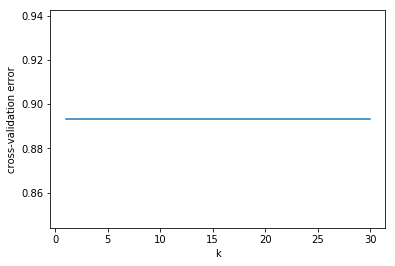

In [229]:
time_start =time.time()

ks = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30]

# ================================================================ #
# YOUR CODE HERE:
#   Calculate the cross-validation error for each k in ks, testing
#   the trained model on each of the 5 folds.  Average these errors
#   together and make a plot of k vs. cross-validation error. Since 
#   we are assuming L2 distance here, please use the vectorized code!
#   Otherwise, you might be waiting a long time.
# ================================================================ #

cv_error = np.zeros((len(ks), 5))
rows = int(X_train.shape[0] / 5)
cols = X_train.shape[1]

for ki in np.arange(len(ks)):
    for i in np.arange(5): # train on the other 4 folds
        x_train_i = np.array([]).reshape(0, cols)
        y_train_i = []
        
        for j in np.arange(5):
            if j != i: # convert back into (4000, 3072) shape
                x_train_i = np.vstack((x_train_i, X_train_folds[j].reshape(rows, cols)))
                y_train_i = np.hstack((y_train_i, y_train_folds[j]))
        
        knn.train(x_train_i, y_train_i)
        dists_i = knn.compute_L2_distances_vectorized(X_train_folds[i].reshape(rows, cols))
        predicted = knn.predict_labels(dists_i, 2)
        print(predicted)
        print(y_test)
        diff = [1 if predicted != actual else 0 for predicted, actual in zip(predicted, y_test)]
        cv_error[ki][i] = sum(diff) / len(y_test)

# for i in np.arange(5):
#     # train on the other 4 folds
#     x_train_i = np.array([]).reshape(0, cols)
#     y_train_i = []
#     for j in np.arange(5):
#         if j != i: # convert back into (4000, 3072) shape
#             x_train_i = np.vstack((x_train_i, X_train_folds[j].reshape(rows, cols)))
#             y_train_i = np.hstack((y_train_i, y_train_folds[j]))
    
#     knn.train(x_train_i, y_train_i)
#     # convert fold into (, 3072) shape
#     dists_i = knn.compute_L2_distances_vectorized(X_train_folds[i].reshape(rows, cols)) # get distance and prediction for each fold
    
#     for z in np.arange(len(ks)):
#         predicted = knn.predict_labels(dists_i, ks[z]) # predict labels for each value of k
#         diff = [1 if predicted != actual else 0 for predicted, actual in zip(predicted, y_test)]
#         cv_error[z][i] = sum(diff) / len(y_test) # error for each k for this fold

print(cv_error)
error = []
for ki in np.arange(len(ks)):
    error.append(sum(cv_error[ki]) / 5) # average the errors across the folds
    
print(error)

plt.figure()
plt.plot(ks, error)
plt.xlabel("k")
plt.ylabel("cross-validation error")

print('Computation time: %.2f'%(time.time()-time_start))

## Questions:

(1) What value of $k$ is best amongst the tested $k$'s?

(2) What is the cross-validation error for this value of $k$?

## Answers:

(1) k = 25

(2) 0.8884

### Optimizing the norm

Next, we test three different norms (the 1, 2, and infinity norms) and see which distance metric results in the best cross-validation performance.

Computation time: 984.64


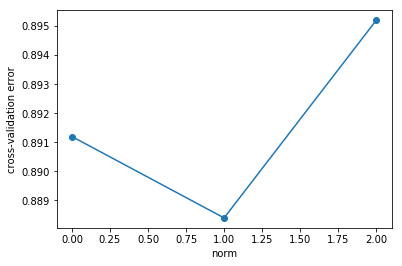

In [205]:
time_start =time.time()

L1_norm = lambda x: np.linalg.norm(x, ord=1)
L2_norm = lambda x: np.linalg.norm(x, ord=2)
Linf_norm = lambda x: np.linalg.norm(x, ord= np.inf)
norms = [L1_norm, L2_norm, Linf_norm]

# ================================================================ #
# YOUR CODE HERE:
#   Calculate the cross-validation error for each norm in norms, testing
#   the trained model on each of the 5 folds.  Average these errors
#   together and make a plot of the norm used vs the cross-validation error
#   Use the best cross-validation k from the previous part.  
#
#   Feel free to use the compute_distances function.  We're testing just
#   three norms, but be advised that this could still take some time.
#   You're welcome to write a vectorized form of the L1- and Linf- norms
#   to speed this up, but it is not necessary.
# ================================================================ #

best_k = 25
cv_error = np.zeros((len(norms), 5))
rows = int(X_train.shape[0] / 5)
cols = X_train.shape[1]

for i in np.arange(5):
    # train on the other 4 folds
    x_train_i = np.array([]).reshape(0, cols) # training set = x_train_i, testing = X_train_folds[i]
    y_train_i = []
    for j in np.arange(5):
        if j != i:
            x_train_i = np.vstack((x_train_i, X_train_folds[j].reshape(rows, cols))) # (4000, 3072)
            y_train_i = np.hstack((y_train_i, y_train_folds[j]))
    
    knn.train(x_train_i, y_train_i)
    
#     cur_fold = X_train_folds[i].reshape(rows, cols)
#     num_test = cur_fold.shape[0] # 1000
#     num_train = x_train_i.shape[0] # 4000

    for n in np.arange(len(norms)):
#         dists = np.zeros((num_test, num_train))
        
        # code from compute_distances
#         for r in np.arange(num_test): # 1000, cur_fold (1000,3072)
#           for c in np.arange(num_train): # 4000, x_train_i (4000,3072)
#             dists[r,c] = norms[n](cur_fold[r] - x_train_i[c]) # use each norm

        dists_i = knn.compute_distances(X_train_folds[i].reshape(rows, cols), norms[n])

        predicted = knn.predict_labels(dists_i, best_k) # predict labels for best val of k
        diff = [1 if predicted != actual else 0 for predicted, actual in zip(predicted, y_test)]
        cv_error[n][i] = sum(diff) / len(y_test) # error for each norm for this fold

error = []
for m in np.arange(len(norms)):
    error.append(sum(cv_error[m]) / 5) # average the errors across the folds

norms_plt = [0,1,2]
    
plt.figure()
plt.plot(norms_plt, error, 'o-')
plt.xlabel("norm")
plt.ylabel("cross-validation error")

print('Computation time: %.2f'%(time.time()-time_start))

## Questions:

(1) What norm has the best cross-validation error?

(2) What is the cross-validation error for your given norm and k?

## Answers: 

(1) The L1 norm has the best cross-validation error.

(2) The error for the given norm and k is about 0.876

# Evaluating the model on the testing dataset.

Now, given the optimal $k$ and norm you found in earlier parts, evaluate the testing error of the k-nearest neighbors model.

In [189]:
error = 1

# ================================================================ #
# YOUR CODE HERE:
#   Evaluate the testing error of the k-nearest neighbors classifier
#   for your optimal hyperparameters found by 5-fold cross-validation.
# ================================================================ #

best_norm = L2_norm
knn.train(X_train, y_train)
dists = knn.compute_distances(X_test, best_norm)
predicted = knn.predict_labels(dists, best_k)
diff = [1 if predicted != actual else 0 for predicted, actual in zip(predicted, y_test)]
error = sum(diff) / len(y_test)


print('Error rate achieved: {}'.format(error))

Error rate achieved: 0.726


## Question:

How much did your error improve by cross-validation over naively choosing $k=1$ and using the L2-norm?

## Answer:

You fill this in.